In [3]:
# Import main librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from sklearn import preprocessing, decomposition
from sklearn.manifold import TSNE

# For images
from IPython.display import Image

# Ignore warning parts
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import datasets
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
translation = pd.read_csv('product_category_name_translation.csv', sep=',')

In [5]:
# Show all the columns of pandas dataframes
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 50
    display.max_rows = 50
    display.max_colwidth = 100
    display.width = None
    
set_pandas_display_options()

# 1) First view and cleaning of all single datasets

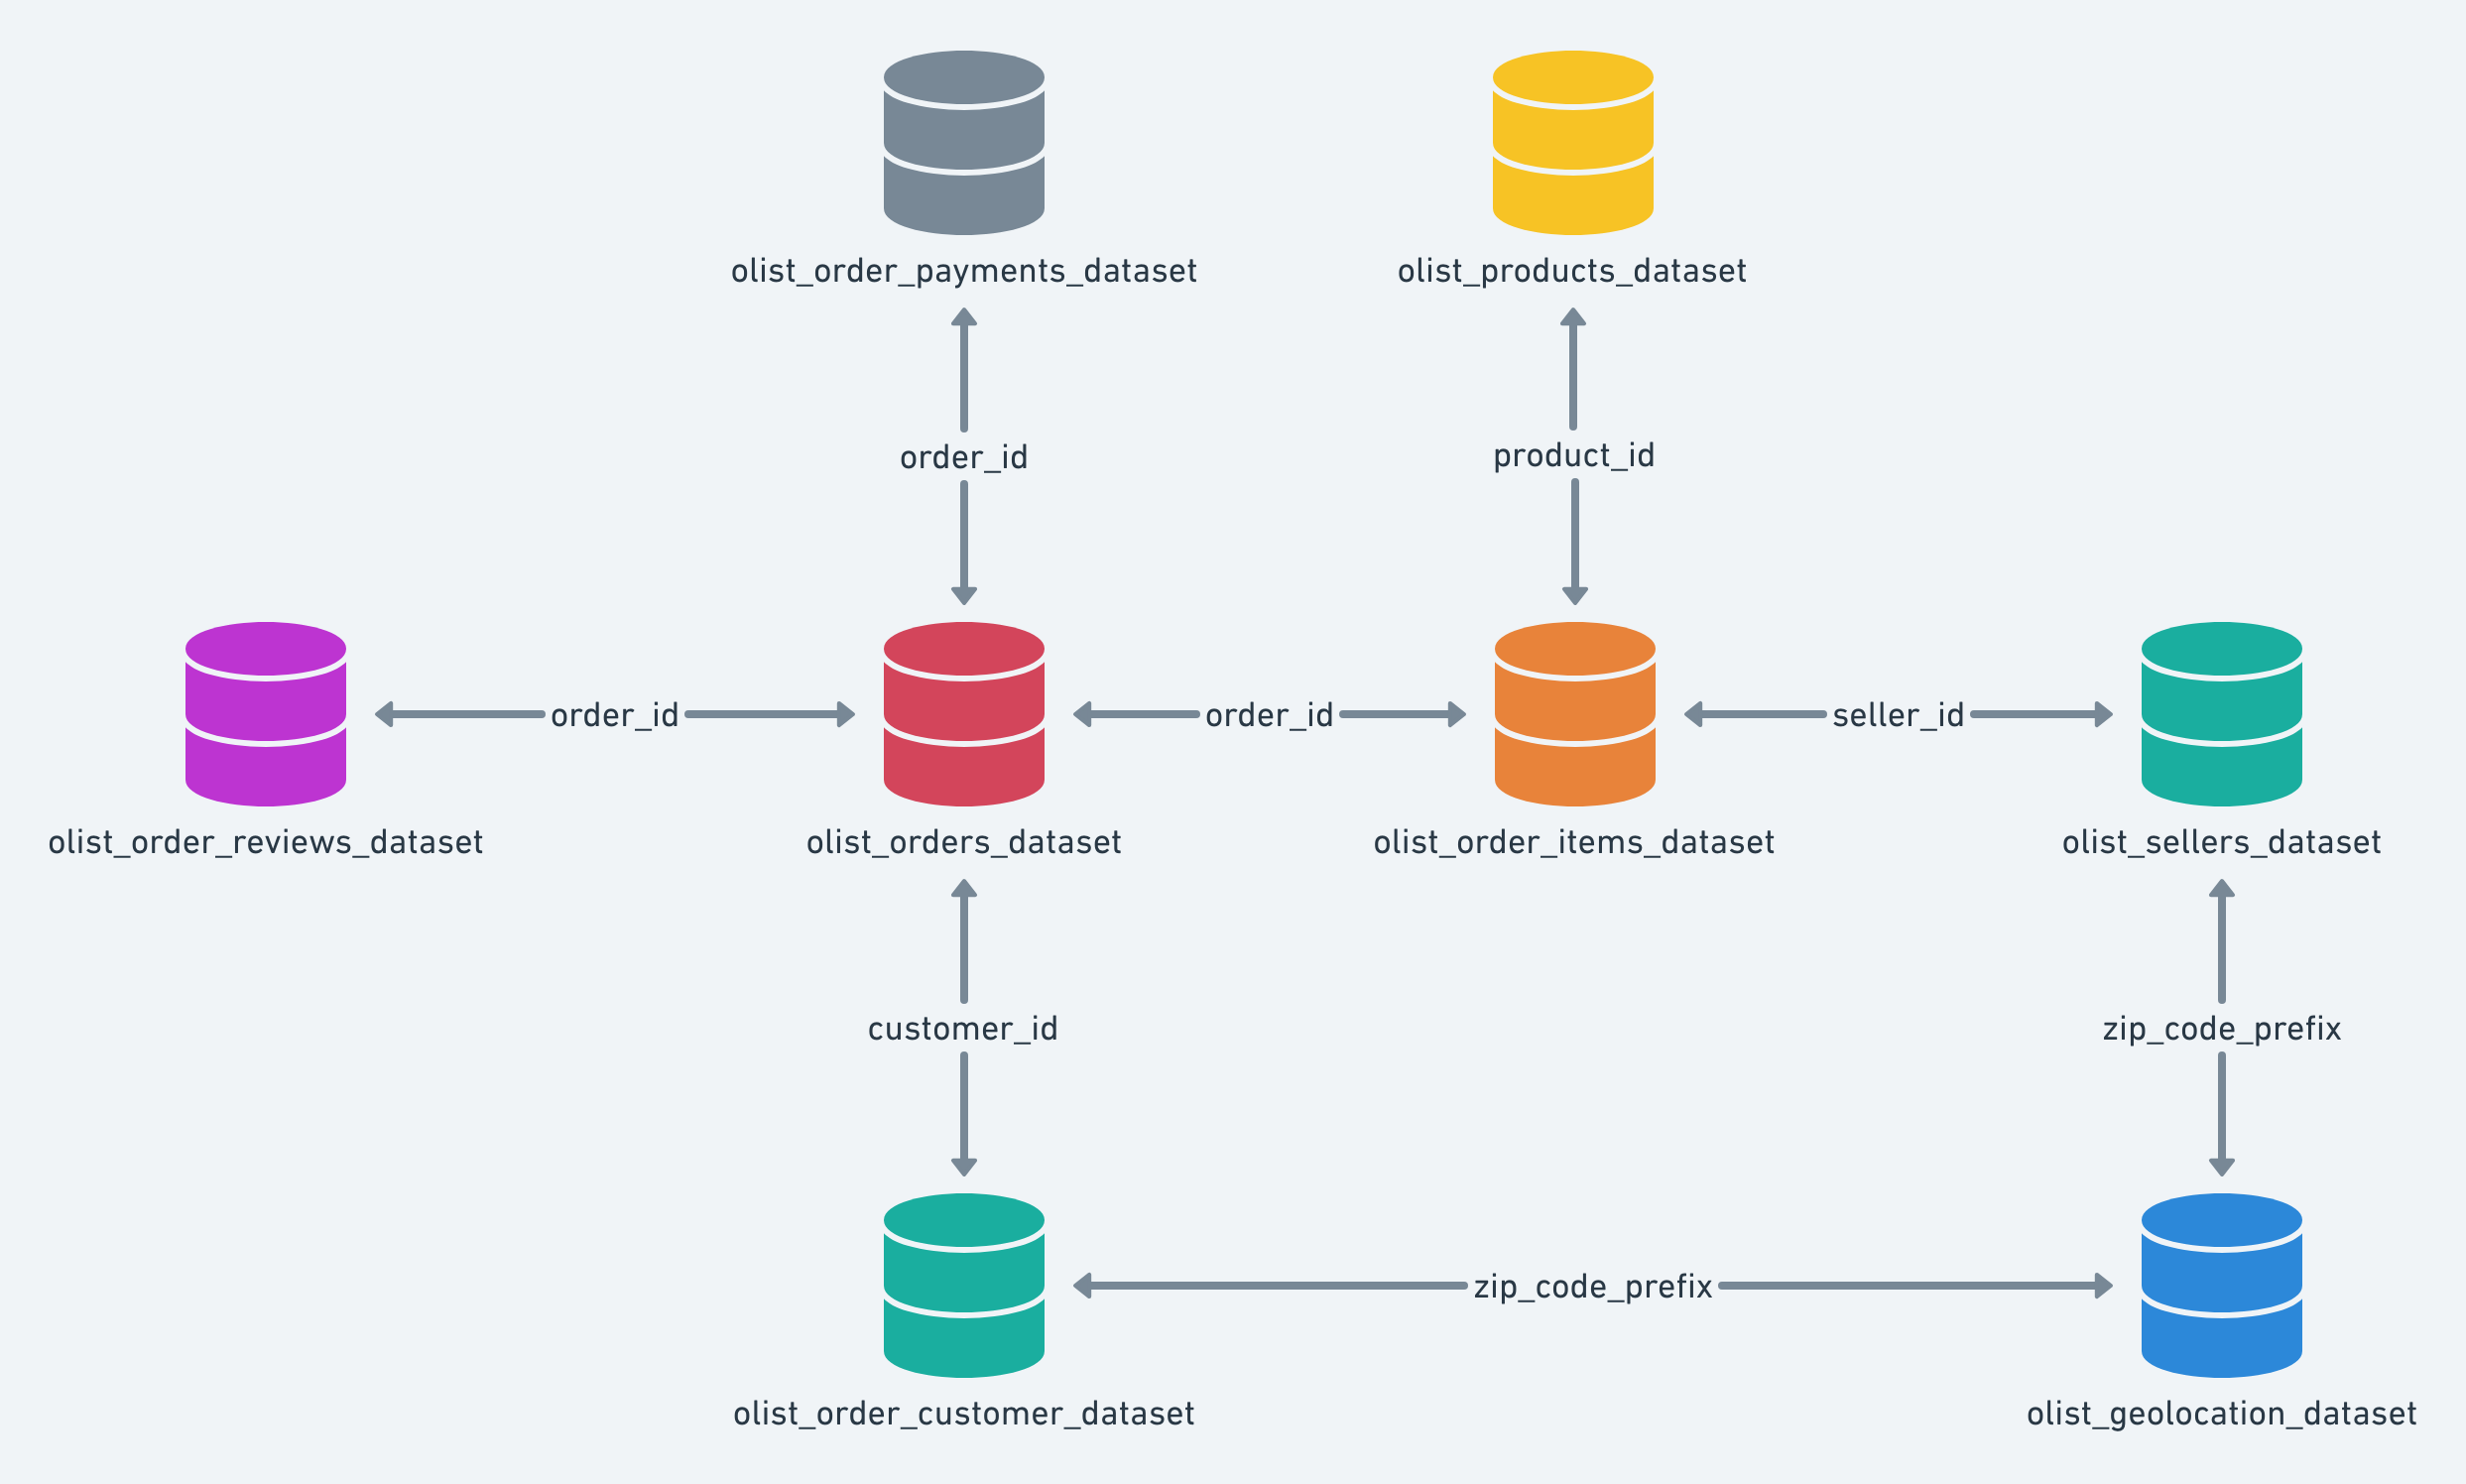

In [6]:
Image(filename = "C:\/Users/33624/Downloads/dataset_scheme_olist.png", width = 800, height = 200)

## 1) a) Dataset 'sellers'

In [7]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [8]:
sellers.shape

(3095, 4)

In [9]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [10]:
# Duplicates?
sellers.duplicated().sum()

0

In [11]:
sellers.duplicated('seller_id').sum()

0

In [12]:
# Analysis of different features

# Number of different seller_id
print('number of different seller_id =', 
      len(sellers['seller_id'].unique().tolist()))
print('-------------------------------------------')

# Number of different zip_code_prefix
print('number of different zip_code_prefix =', 
      len(sellers['seller_zip_code_prefix'].unique().tolist()))
print('-------------------------------------------')
      
# Number of different seller_city
print('number of different seller_city =', 
      len(sellers['seller_city'].unique().tolist()))
print('-------------------------------------------')

# Number of different seller_state
print('number of different seller_state =', 
      len(sellers['seller_state'].unique().tolist()))

number of different seller_id = 3095
-------------------------------------------
number of different zip_code_prefix = 2246
-------------------------------------------
number of different seller_city = 611
-------------------------------------------
number of different seller_state = 23


In [13]:
# Number of sellers by seller_zip_code_prefix
sellers['seller_zip_code_prefix'].value_counts().to_dict()

{14940: 49,
 13660: 10,
 16200: 9,
 13920: 9,
 14020: 8,
 87050: 8,
 1026: 8,
 37540: 7,
 13481: 7,
 87015: 6,
 35530: 6,
 18015: 6,
 13560: 5,
 14401: 5,
 12940: 5,
 14075: 5,
 14092: 5,
 82510: 5,
 22790: 5,
 13480: 5,
 81070: 5,
 8710: 5,
 9560: 5,
 14090: 5,
 35501: 4,
 13360: 4,
 9810: 4,
 9230: 4,
 15155: 4,
 14096: 4,
 15025: 4,
 88704: 4,
 14403: 4,
 9111: 4,
 15015: 4,
 36500: 4,
 38400: 4,
 14802: 4,
 37564: 4,
 86010: 4,
 83323: 4,
 18500: 4,
 35570: 4,
 88301: 4,
 31255: 4,
 17400: 4,
 86800: 4,
 80010: 4,
 81350: 4,
 13330: 4,
 13070: 4,
 88330: 4,
 3029: 4,
 87083: 4,
 22793: 4,
 14085: 4,
 80240: 4,
 87025: 4,
 35500: 4,
 35700: 3,
 80710: 3,
 95800: 3,
 88359: 3,
 86706: 3,
 13930: 3,
 13840: 3,
 13043: 3,
 13880: 3,
 83408: 3,
 22775: 3,
 11701: 3,
 13405: 3,
 1123: 3,
 9015: 3,
 14801: 3,
 18040: 3,
 80620: 3,
 8577: 3,
 80220: 3,
 6018: 3,
 9070: 3,
 2310: 3,
 6717: 3,
 86047: 3,
 18550: 3,
 4133: 3,
 8275: 3,
 8223: 3,
 12327: 3,
 14406: 3,
 84010: 3,
 37410: 3,
 85

In [14]:
# Number of sellers by seller_city
sellers['seller_city'].value_counts().to_dict()

{'sao paulo': 694,
 'curitiba': 127,
 'rio de janeiro': 96,
 'belo horizonte': 68,
 'ribeirao preto': 52,
 'guarulhos': 50,
 'ibitinga': 49,
 'santo andre': 45,
 'campinas': 41,
 'maringa': 40,
 'sao jose do rio preto': 33,
 'sorocaba': 32,
 'sao bernardo do campo': 32,
 'osasco': 32,
 'brasilia': 28,
 'porto alegre': 28,
 'londrina': 26,
 'goiania': 23,
 'joinville': 22,
 'blumenau': 21,
 'sao caetano do sul': 20,
 'franca': 20,
 'caxias do sul': 18,
 'sao jose dos campos': 18,
 'florianopolis': 18,
 'limeira': 17,
 'santos': 16,
 'mogi das cruzes': 15,
 'marilia': 15,
 'cascavel': 14,
 'jundiai': 14,
 'bauru': 14,
 'barueri': 13,
 'maua': 13,
 'sao carlos': 13,
 'piracicaba': 12,
 'presidente prudente': 12,
 'contagem': 12,
 'rio claro': 12,
 'uberlandia': 12,
 'atibaia': 11,
 'araraquara': 11,
 'taboao da serra': 10,
 'carapicuiba': 10,
 'catanduva': 10,
 'praia grande': 10,
 'brusque': 10,
 'americana': 10,
 'itajai': 10,
 'birigui': 10,
 'arapongas': 10,
 'cotia': 10,
 'juiz de fo

In [15]:
# Show exact values on barplots
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

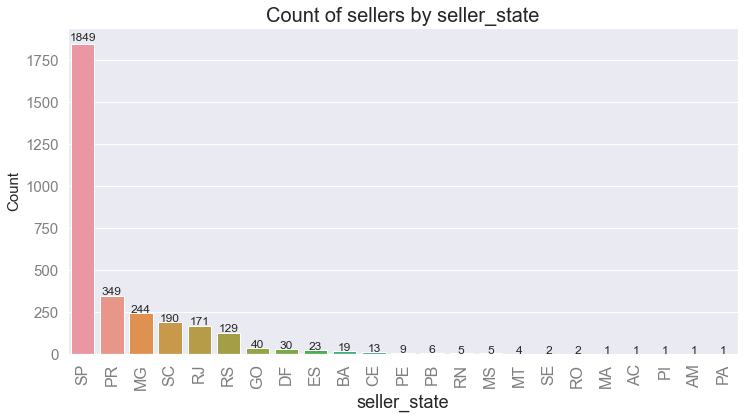

In [16]:
# Count plot of sellers by seller_state

plt.figure(figsize = (12,6))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "seller_state",
                  data = sellers,
                  order = sellers['seller_state'].value_counts().index)
                  # Descending count plot

plt.yticks(fontsize = 15, color = 'grey')
plt.xticks(fontsize = 16, rotation = 90, color = 'grey')

plt.xlabel("seller_state", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of sellers by seller_state", size = 20)

# showing exact values on bars
show_values(g);

### Conclusions for dataset 'sellers' :
- no NaN, no duplicates
- Most of the sellers are from SP state
- Considering this survey concerns e-commerce, the features of this dataset do not seem relevant

## 1) b) Dataset 'products'

In [17]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [18]:
products.shape

(32951, 9)

In [19]:
products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [20]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
# Duplicates?
products.duplicated().sum()

0

In [22]:
products.duplicated('product_id').sum()

0

In [23]:
# Number of different product_category_name
print('number of different product_category_name =', 
      len(products['product_category_name'].unique().tolist()))

number of different product_category_name = 74


In [24]:
# Number of products by product_category_name
products['product_category_name'].value_counts().to_dict()

{'cama_mesa_banho': 3029,
 'esporte_lazer': 2867,
 'moveis_decoracao': 2657,
 'beleza_saude': 2444,
 'utilidades_domesticas': 2335,
 'automotivo': 1900,
 'informatica_acessorios': 1639,
 'brinquedos': 1411,
 'relogios_presentes': 1329,
 'telefonia': 1134,
 'bebes': 919,
 'perfumaria': 868,
 'papelaria': 849,
 'fashion_bolsas_e_acessorios': 849,
 'cool_stuff': 789,
 'ferramentas_jardim': 753,
 'pet_shop': 719,
 'eletronicos': 517,
 'construcao_ferramentas_construcao': 400,
 'eletrodomesticos': 370,
 'malas_acessorios': 349,
 'consoles_games': 317,
 'moveis_escritorio': 309,
 'instrumentos_musicais': 289,
 'eletroportateis': 231,
 'casa_construcao': 225,
 'livros_interesse_geral': 216,
 'fashion_calcados': 173,
 'moveis_sala': 156,
 'climatizacao': 124,
 'livros_tecnicos': 123,
 'telefonia_fixa': 116,
 'casa_conforto': 111,
 'alimentos_bebidas': 104,
 'market_place': 104,
 'fashion_roupa_masculina': 95,
 'moveis_cozinha_area_de_servico_jantar_e_jardim': 94,
 'sinalizacao_e_seguranca': 93

### Conclusions for dataset 'products':
- 610 NaN for 4 features
- 2 NaN for 4 other features
- except the feature 'product_category_name' (610 NaN - dropna needeed in case this feature is used), the features of this dataset are not relevant for this survey

### Cleaning of dataset 'products'

In [25]:
# Drop NaN for the feature 'product_category_name'
products = products.dropna(subset = ['product_category_name'])

In [26]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

## 1) c) Dataset 'orders'

In [27]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [28]:
orders.shape

(99441, 8)

In [29]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
# Duplicates?
orders.duplicated().sum()

0

In [31]:
orders.duplicated('order_id').sum()

0

In [32]:
orders.duplicated('customer_id').sum()

0

In [33]:
# Number of each order_status
orders['order_status'].value_counts().to_dict()

{'delivered': 96478,
 'shipped': 1107,
 'canceled': 625,
 'unavailable': 609,
 'invoiced': 314,
 'processing': 301,
 'created': 5,
 'approved': 2}

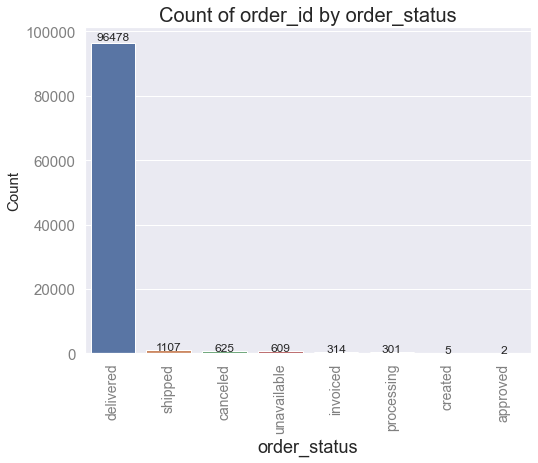

In [34]:
# Count plot of order_id by order_status

plt.figure(figsize = (8,6))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "order_status",
                  data = orders,
                  order = orders['order_status'].value_counts().index)
                  # Descending count plot

plt.yticks(size = 15, color = 'grey')
plt.xticks(size = 14, rotation = 90, color = 'grey')

plt.xlabel("order_status", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of order_id by order_status", size = 20)

# Showing exact values on bars
show_values(g);

In [35]:
# Creating dataframe only with 'delivered' order_status
orders_delivered = orders.loc[orders['order_status'] == 'delivered']

In [36]:
orders_delivered.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [37]:
# Create list of 'order_id' from dataframe 'orders_delivered'
list_order_id_delivered = orders_delivered['order_id'].tolist()

In [38]:
len(list_order_id_delivered)

96478

-> 96478 orders are supposed to be delivered

In [39]:
# Creating dataframe with all order_status except 'delivered'
orders_not_delivered = orders.loc[orders['order_status'] != 'delivered']

In [40]:
orders_not_delivered.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [41]:
# Create list of 'order_id' from dataframe 'orders_not_delivered'
list_order_id_not_delivered = orders_not_delivered['order_id'].tolist()

In [42]:
len(list_order_id_not_delivered)

2963

-> 2963 orders are supposed to be not delivered

In [43]:
# Create dataframe to observe count of orders by date
order_time = orders[['order_id','order_purchase_timestamp']]

# Transform dtypes 'order_purchase_timestamp' to datetime
order_time['order_purchase_timestamp'] = pd.to_datetime(order_time['order_purchase_timestamp'])

# Transform dtypes 'order_purchase_timestamp' to date
order_time['order_purchase_timestamp'] = order_time['order_purchase_timestamp'].dt.date

# Sort values by date
order_time.sort_values('order_purchase_timestamp', inplace = True)

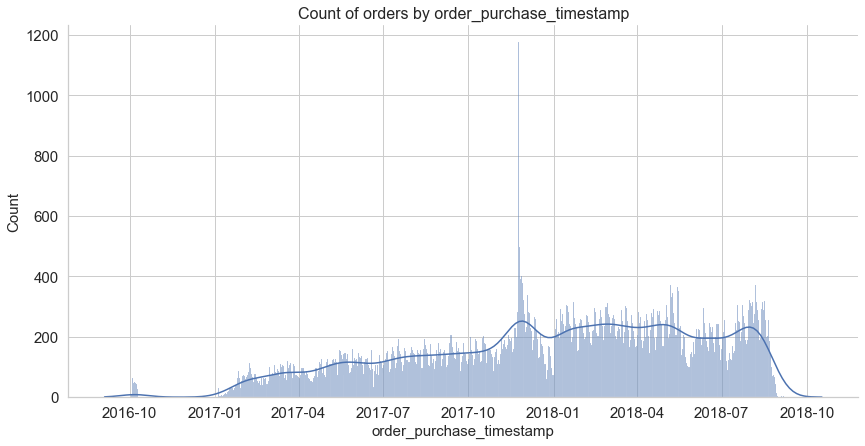

In [44]:
sns.set_theme(style = "whitegrid")

g = sns.displot(order_time, x = "order_purchase_timestamp", 
                bins = 1000, kde = True, height = 6, aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("order_purchase_timestamp", size = 15)
plt.ylabel("Count", size = 15)

plt.title("Count of orders by order_purchase_timestamp", size = 16);

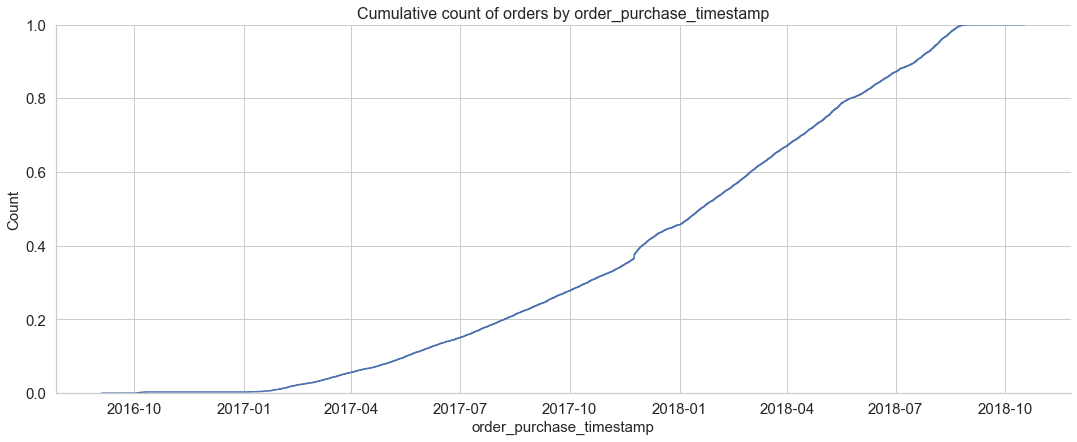

In [45]:
sns.set_theme(style = "whitegrid")

g = sns.displot(order_time, x = "order_purchase_timestamp", 
                kind = "ecdf", height = 6, aspect = 2.5)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("order_purchase_timestamp", size = 15)
plt.ylabel("Count", size = 15)

plt.title("Cumulative count of orders by order_purchase_timestamp", size = 16);

### Conclusions for dataset 'orders'
- NaN for features 'order_approved_at', 'order_delivered_carrier_date' and 'order_delivered_customer_date', but there is no need to dropna. Indeed 'order_purchase_timestamp' (no NaN) will be used as time feature
- It will be interesting to use the two different datasets 'orders_delivered' and 'orders_not_delivered' as it can impact review scores et and review comment messages

## 1) d) Dataset 'order_reviews'

In [46]:
order_reviews.head(50)

review_id                          order_id  \
0   7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1   80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2   228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
5   15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6   07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
7   7c6400515c67679fbee952a7525281ef  c31a859e34e3adac22f376954e19b39d   
8   a3f6f7f6f433de0aefbb97da197c554c  9c214ac970e84273583ab523dfafd09b   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
10  c9cfd2d5ab5911836ababae136c3a10c  cdf9aa68e72324eeb25c7de974696ee2   
11  96052551d87e5f62e6c9f6974ec392e9  3d374c9e46530bb5ed4a7648915306a6   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
13  23f75a37effc35d9a915b4e1ad483793  2eaf8e099d871cd5c22b83b5ea8f6e0e   
14  9a0abbb668bafb95a6d2b05db43284c4  d7bd0e4afdf94846eb73642b4e3e75c3   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
16  9314d6f9799f5bfba510cc7bcd468c01  0dacf04c5ad59fd5a0cc1faa07c34e39   
17  8e15a274d95600fa14f8be64e37a0e67  ff1581e08b3011021e7c7de592ddc81e   
18  fdbdb2629a7cde0f66657acc92084e7f  70a752414a13d09cc1f2b437b914b28e   
19  373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   
20  a2ff510ca4e059c3fefc7a7866571f6f  a9953b2f0b1665ac7586cc5a6ac8f58c   
21  80c70bc263881ba6525f6cee1d94ac87  ae168dfba236919411fe08f336fefa44   
22  d21bbc789670eab777d27372ab9094cc  4fc44d78867142c627497b60a7e0228a   
23  7bcb3c758c67f23638262c731493e848  7c9956750739a47dba7a6928ba2f0245   
24  0e0190b9db53b689b285d3f3916f8441  79832b7cb59ac6f887088ffd686e1d5e   
25  66e4430c5bc6b7e3773886bf1c14d912  84cec4f65c7a4f2f54c294a30224a594   
26  bf566b3910c328733baf7fca7d2be041  a59a15e4b6085c752d338431dc68d464   
27  fe3db7c069d694bab50cc43463f91608  2ca73e2ff9e3a186ad1e1ffb9b1d9c10   
28  e07eee7ad7666276bd8b27fbd83fd1ff  68b3cbc68e4cd1fe19bec35f1d3bb7ee   
29  2c5e27fc178bde7ac173c9c62c31b070  0ce9a24111d850192a933fcaab6fbad3   
30  540e7bbb2d06cfb7f85f3a88ba7ac97f  cf73e2cb1f4a9480ed70c154da3d954a   
31  6a18a4001ae7fd911b3b9fb13686d105  8ba3f3a9292fbc22a8b7dff752bbcd37   
32  58044bca115705a48fe0e00a21390c54  68e55ca79d04a79f20d4bfc0146f4b66   
33  19a52a2297e5289ab4187d238d335982  677c865b89aa97e7dbeb4bfbb50bbcfd   
34  c92cdd7dd544a01aa35137f901669cdf  37e7875cdce5a9e5b3a692971f370151   
35  c0f4c8301f8c29d6f53d239e194bb4c2  04db86e3493b3724ac4bd3c9a397e23c   
36  08c9d79ec0eba1d252e3f52f14b8e6a9  e029f708df3cc108b3264558771605c6   
37  2170c9452c2216457b36003fe2969fbb  af32671d0b8ce510a94d9111d97371d3   
38  b193ff3c9f32a01f3a0d9ae26b94d244  e2e6ee1ed2d7f2f36b05d234983bd7a0   
39  9fd59cd04b42f600df9f25e54082a8d1  3c314f50bc654f3c4e317b055681dff9   
40  ab3056e4fb5a36df4b58c1746e4a6b8f  aad1dcbe4c9fe2e3486e5e04c6649097   
41  eb26c2bfb5030f57dcef30d3f111eb1e  88096595631e8d26b658306256e3ce34   
42  caf7d6d68090fedf0f47b27aff4b4eaf  c186ebe3937470a2f562a2dc0bc74dd7   
43  86c5cfa7fcbde303f704b60a78ced7d6  a6456e781cb962cc3f412b04de4fed7b   
44  6f3eb43ec2f5092cf04c8d705864a8ac  f3a9c397a2fa5a2366b4b96bc15737f6   
45  3dc0777d97733a1d066f5b781e91577f  44a9994228432b835c3a4e720b6a41ab   
46  e363a3c172db72d6a8b82d0726cd2ddb  1a36784e5c696071dad8a242f26b230f   
47  890ec1767be8eb104877db6d68eaade5  b3271f5ebce80cbecb67c5b88487a44a   
48  23f570a1b0db9566bee04521a0410c54  82c5edeff15e09a0460d292874766132   
49  7d9ac3e98adc0c8ad579e6a2257d79f9  dfa48852c93427261c98fb2e01f33bea   

    review_score     review_comment_title  \
0              4                      NaN   
1              5                      NaN   
2              5                      NaN   
3              5                      NaN   
4              5           

In [47]:
order_reviews.shape

(99224, 7)

In [48]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [49]:
# Duplicates ?
order_reviews.duplicated().sum()

0

In [50]:
order_reviews.duplicated('review_id').sum()

814

In [51]:
order_reviews.duplicated('order_id').sum()

551

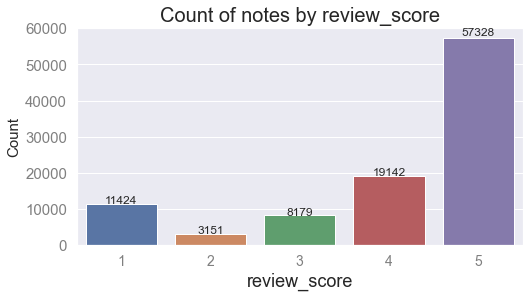

In [52]:
# Countplot of notes by review_score

plt.figure(figsize = (8,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "review_score", 
                  data = order_reviews)

plt.yticks(fontsize = 15, color = 'grey')
plt.xticks(fontsize = 14, color = 'grey')

plt.xlabel("review_score", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of notes by review_score", size = 20)

show_values(g);

In [53]:
# Create dataframe 'orders_order_reviews' by merging 'orders' and 'order_reviews'
orders_order_reviews = pd.merge(orders[['order_id',
                                        'customer_id',
                                        'order_status',
                                        'order_purchase_timestamp']],
                               order_reviews[['review_id',
                                              'order_id',
                                              'review_score',
                                              'review_comment_message',
                                              'review_creation_date']])

In [54]:
orders_order_reviews.shape

(99224, 8)

In [55]:
# Change NaN by 'None' for features 'review_comment_title' and 'review_comment_message'
orders_order_reviews = orders_order_reviews.fillna(value = {'review_comment_title' : 'None',
                                                            'review_comment_message' : 'None'})

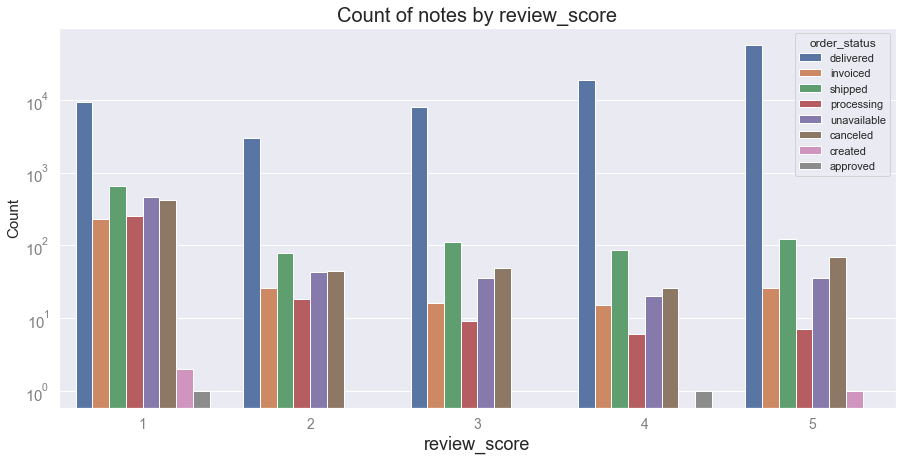

In [56]:
# Countplot of notes by review_score and order_status

plt.figure(figsize = (15,7))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "review_score", 
                  data = orders_order_reviews,
                  hue = 'order_status')

g.set(yscale='log')

plt.yticks(fontsize = 15, color = 'grey')
plt.xticks(fontsize = 14, color = 'grey')

plt.xlabel("review_score", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of notes by review_score", size = 20)

plt.show;

In [57]:
# Change NaN by 'None' for features 'review_comment_title' and 'review_comment_message'
order_reviews = order_reviews.fillna(value = {'review_comment_title' : 'None',
                                              'review_comment_message' : 'None'})

In [58]:
# Number of different review_comment_message
order_reviews['review_comment_message'].value_counts().to_dict()

{'None': 58247,
 'Muito bom': 230,
 'Bom': 189,
 'muito bom': 122,
 'bom': 107,
 'Recomendo': 100,
 'Otimo': 99,
 'otimo': 96,
 'Ótimo': 77,
 'Ótimo ': 74,
 'Ok': 72,
 'Excelente': 71,
 'Muito bom ': 66,
 'recomendo': 65,
 'ok': 55,
 '.': 51,
 'Recomendo ': 50,
 'Boa': 47,
 'Tudo ok': 45,
 'Ótimo produto': 44,
 'Não recebi o produto': 37,
 'Gostei': 37,
 'Excelente ': 34,
 'Muito bom.': 34,
 'excelente': 32,
 'boa': 31,
 'Recomendo.': 27,
 'ótimo': 27,
 'tudo ok': 25,
 'Adorei': 25,
 'Muito bom!': 24,
 'otima': 24,
 'Nota 10': 23,
 'Tudo certo': 23,
 'Gostei muito': 22,
 'Ótimo produto ': 21,
 'Bom produto': 20,
 'Chegou antes do prazo': 20,
 'Perfeito': 19,
 'Ótimo produto.': 19,
 '10': 19,
 'Ótima ': 18,
 'Bom ': 18,
 'Super recomendo': 18,
 'otimo produto': 17,
 'Top': 17,
 'Satisfeito': 16,
 'Produto muito bom': 16,
 'Tudo certo ': 16,
 'Muito bom o produto': 16,
 'bom produto': 15,
 '\r\n': 14,
 'Recomendo a todos': 14,
 'Tudo perfeito': 14,
 'Produto entregue antes do prazo.': 14

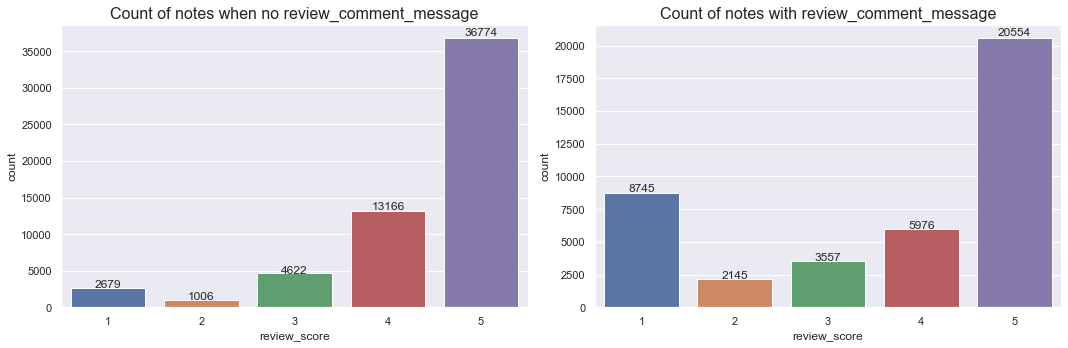

In [59]:
# Count plots for review_score
fig, ax = plt.subplots(ncols = 2,figsize = (15,5))

sns.set_theme(style = "darkgrid")

# Create dataframe when 'review_comment_message' == 'None'
no_comment = order_reviews.loc[order_reviews['review_comment_message'] == 'None']

g = sns.countplot(x = 'review_score',
                  data = no_comment,
                  ax = ax[0])

ax[0].set_title("Count of notes when no review_comment_message", size = 16)

show_values(g)

# Create dataframe when 'review_comment_message' != 'None'
comment = order_reviews.loc[order_reviews['review_comment_message'] != 'None']

g = sns.countplot(x = 'review_score',
                  data = comment,
                  ax = ax[1])

ax[1].set_title("Count of notes with review_comment_message", size = 16)

show_values(g)

fig.tight_layout();

In [60]:
# Create 'order_reviews_delivered' dataframe
order_reviews_delivered = order_reviews.loc[order_reviews['order_id'].isin(list_order_id_delivered)]

In [61]:
order_reviews_delivered.shape

(96361, 7)

In [62]:
order_reviews_delivered.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [63]:
order_reviews_delivered.duplicated('review_id').sum()

714

In [64]:
order_reviews_delivered.duplicated('order_id').sum()

529

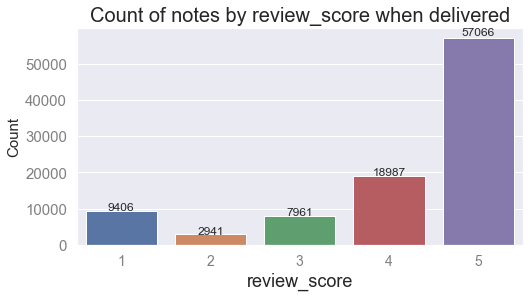

In [65]:
# Countplot of notes by review_score when delivered

plt.figure(figsize = (8,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "review_score", 
                  data = order_reviews_delivered)

plt.yticks(fontsize = 15, color = 'grey')
plt.xticks(fontsize = 14, color = 'grey')

plt.xlabel("review_score", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of notes by review_score when delivered", size = 20)

show_values(g);

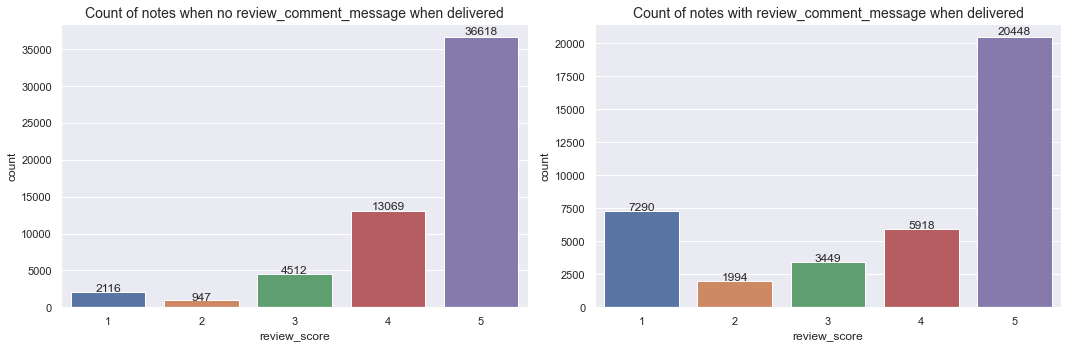

In [66]:
# Count plot for review_score
fig, ax = plt.subplots(ncols = 2,figsize = (15,5))

sns.set_theme(style = "darkgrid")

# Create dataframe when 'review_comment_message' == 'None'
no_comment = order_reviews_delivered.loc[order_reviews_delivered['review_comment_message'] == 'None']

g = sns.countplot(x = 'review_score',
                  data = no_comment,
                  ax = ax[0])

ax[0].set_title("Count of notes when no review_comment_message when delivered", size = 14)

show_values(g)

# Create dataframe when 'review_comment_message' != 'None'
comment = order_reviews_delivered.loc[order_reviews_delivered['review_comment_message'] != 'None']

g = sns.countplot(x = 'review_score',
                  data = comment,
                  ax = ax[1])

ax[1].set_title("Count of notes with review_comment_message when delivered", size = 14)

show_values(g)

fig.tight_layout();

In [67]:
# Create 'order_reviews_not_delivered' dataframe
order_reviews_not_delivered = order_reviews.loc[order_reviews['order_id'].isin(list_order_id_not_delivered)]

In [68]:
order_reviews_not_delivered.shape

(2863, 7)

In [69]:
order_reviews_not_delivered.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

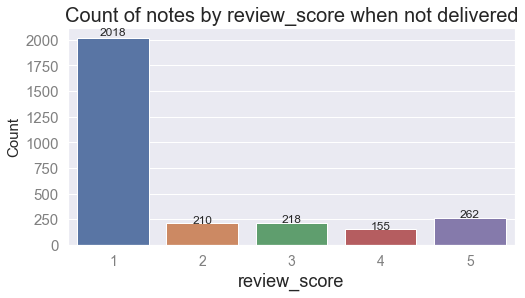

In [70]:
# Countplot of notes by review_score when not delivered

plt.figure(figsize= (8,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "review_score", 
                  data = order_reviews_not_delivered)

plt.yticks(fontsize = 15, color = 'grey')
plt.xticks(fontsize = 14, color = 'grey')

plt.xlabel("review_score", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of notes by review_score when not delivered", size = 20)

show_values(g);

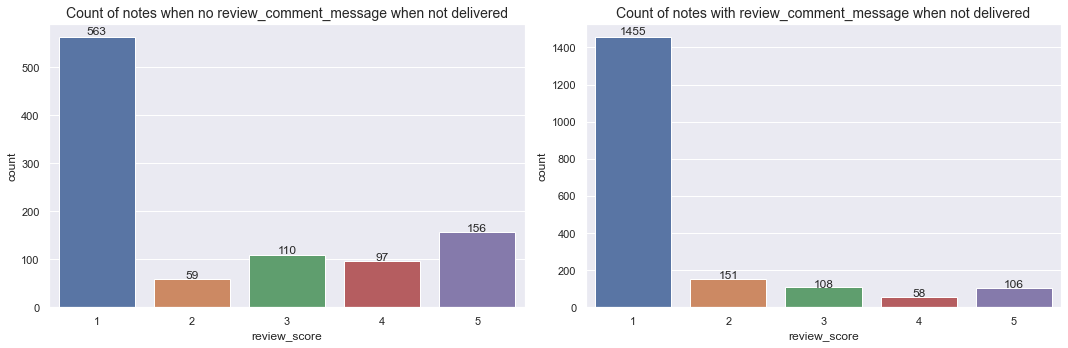

In [71]:
# Count plots for review_score
fig, ax= plt.subplots(ncols=2,figsize=(15,5))

sns.set_theme(style = "darkgrid")

# Create dataframe when 'review_comment_message' == 'None'
no_comment = order_reviews_not_delivered.loc[order_reviews_not_delivered['review_comment_message'] == 'None']

g = sns.countplot(x = 'review_score',
                  data = no_comment,
                  ax = ax[0])

ax[0].set_title("Count of notes when no review_comment_message when not delivered", size = 14)

show_values(g)

# Create dataframe when 'review_comment_message' != 'None'
comment = order_reviews_not_delivered.loc[order_reviews_not_delivered['review_comment_message'] != 'None']

g = sns.countplot(x = 'review_score',
                  data = comment,
                  ax = ax[1])

ax[1].set_title("Count of notes with review_comment_message when not delivered", size = 14)

show_values(g)

fig.tight_layout();

In [72]:
# Creating dataframe reviews only with 'review_id' duplicates
df_reviews_duplicates = order_reviews.loc[order_reviews['review_id'].duplicated(keep = False) == True]
df_reviews_duplicates = df_reviews_duplicates.sort_values(by = 'review_id')
df_reviews_duplicates.shape

(1603, 7)

In [73]:
df_reviews_duplicates.head(10)

review_id                          order_id  \
46678  00130cbe1f9d422698c812ed8ded1919  dfcdfc43867d1c1381bfaf62d6b9c195   
29841  00130cbe1f9d422698c812ed8ded1919  04a28263e085d399c97ae49e0b477efa   
90677  0115633a9c298b6a98bcbe4eee75345f  78a4201f58af3463bdab842eea4bc801   
63193  0115633a9c298b6a98bcbe4eee75345f  0c9850b2c179c1ef60d2855e2751d1fa   
92876  0174caf0ee5964646040cd94e15ac95e  f93a732712407c02dce5dd5088d0f47b   
57280  0174caf0ee5964646040cd94e15ac95e  74db91e33b4e1fd865356c89a61abf1f   
54832  017808d29fd1f942d97e50184dfb4c13  8daaa9e99d60fbba579cc1c3e3bfae01   
99167  017808d29fd1f942d97e50184dfb4c13  b1461c8882153b5fe68307c46a506e39   
20621  0254bd905dc677a6078990aad3331a36  5bf226cf882c5bf4247f89a97c86f273   
96080  0254bd905dc677a6078990aad3331a36  331b367bdd766f3d1cf518777317b5d9   

       review_score review_comment_title  \
46678             1                 None   
29841             1                 None   
90677             5                 None   
63193             5                 None   
92876             1                 None   
57280             1                 None   
54832             5                 None   
99167             5                 None   
20621             1                 None   
96080             1                 None   

                                                                                    review_comment_message  \
46678  O cartucho "original HP" 60XL não é reconhecido pela impressora, consequentemente não funcionou....   
29841  O cartucho "original HP" 60XL não é reconhecido pela impressora, consequentemente não funcionou....   
90677                                                                                                 None   
63193                                                                                                 None   
92876           Produto entregue dentro de embalagem do fornecedor sem os parafusos de fixação das partes.   
57280           Produto entregue dentro de embalagem do fornecedor sem os parafusos de fixação das partes.   
54832                                                                                                 None   
99167                                                                                                 None   
20621  O pedido consta de 2 produtos e até agora recebi apenas 1 produto, e o que me preocupa é que o s...   
96080  O pedido consta de 2 produtos e até agora recebi apenas 1 produto, e o que me preocupa é que o s...   

      review_creation_date review_answer_timestamp  
46678  2018-03-07 00:00:00     2018-03-20 18:08:23  
29841  2018-03-07 00:00:00     2018-03-20 18:08:23  
90677  2017-09-21 00:00:00     2017-09-26 03:27:47  
63193  2017-09-21 00:00:00     2017-09-26 03:27:47  
92876  2018-03-07 00:00:00     2018-03-08 03:00:53  
57280  2018-03-07 00:00:00     2018-03-08 03:00:53  
54832  2018-03-02 00:00:00     2018-03-05 01:43:30  
99167  2018-03-02 00:00:00     2018-03-05 01:43:30  
20621  2017-09-09 00:00:00     2017-09-13 09:52:44  
96080  2017-09-09 00:00:00     2017-09-13 09:52:44

-> It is not logical that there is the same review_id for two different order_id (input error ?)  

-> However we can not drop those duplicates. Indeed it would remove associated order_id that are essential for the survey

In [74]:
# Creating dataframe reviews only with 'order_id' duplicates
df_reviews_duplicates_2 = order_reviews.loc[order_reviews['order_id'].duplicated(keep = False) == True]
df_reviews_duplicates_2 = df_reviews_duplicates_2.sort_values(by = 'order_id')
df_reviews_duplicates_2.shape

(1098, 7)

In [75]:
df_reviews_duplicates_2.head(20)

review_id                          order_id  \
25612  89a02c45c340aeeb1354a24e7d4b2c1e  0035246a40f520710769010f752e7507   
22423  2a74b0559eb58fc1ff842ecc999594cb  0035246a40f520710769010f752e7507   
22779  ab30810c29da5da8045216f0f62652a2  013056cfe49763c6f66bda03396c5ee3   
68633  73413b847f63e02bc752b364f6d05ee9  013056cfe49763c6f66bda03396c5ee3   
854    830636803620cdf8b6ffaf1b2f6e92b2  0176a6846bcb3b0d3aa3116a9a768597   
83224  d8e8c42271c8fb67b9dad95d98c8ff80  0176a6846bcb3b0d3aa3116a9a768597   
17582  017f0e1ea6386de662cbeba299c59ad1  02355020fd0a40a0d56df9f6ff060413   
89888  0c8e7347f1cdd2aede37371543e3d163  02355020fd0a40a0d56df9f6ff060413   
55137  61fe4e7d1ae801bbe169eb67b86c6eda  029863af4b968de1e5d6a82782e662f5   
37911  04d945e95c788a3aa1ffbee42105637b  029863af4b968de1e5d6a82782e662f5   
35812  fa493ead9b093fb0fa6f7d4905b0ef3b  02e0b68852217f5715fb9cc885829454   
17847  2eab0b2e6f5bded4d9b0b2afcfdf4534  02e0b68852217f5715fb9cc885829454   
35052  38821b5c496b678cf91acc34892805ad  02e723e8edb4a123d414f56cc9c4665e   
42500  39b4603793c1c7f5f36d809b4a218664  02e723e8edb4a123d414f56cc9c4665e   
49625  5e1ee2e924a1dd10d80b99555383c0a7  03515a836bb855b03f7df9dee520a8fc   
38386  1dee9d450a2b8533d2085cef898ca4a2  03515a836bb855b03f7df9dee520a8fc   
51527  f4bb9d6dd4fb6dcc2298f0e7b17b8e1e  03c939fd7fd3b38f8485a0f95798f1f6   
8273   b04ed893318da5b863e878cd3d0511df  03c939fd7fd3b38f8485a0f95798f1f6   
69438  405eb2ea45e1dbe2662541ae5b47e2aa  03c939fd7fd3b38f8485a0f95798f1f6   
92880  55bff212ccac64cbacab9dae14850dcd  03eba6d9fef8f5b3e811d4b5a7cca9cd   

       review_score review_comment_title  \
25612             5                 None   
22423             5                 None   
22779             5                 None   
68633             4                 None   
854               5                 None   
83224             5                 None   
17582             1                 None   
89888             3                 None   
55137             4                 None   
37911             5                 None   
35812             4                 None   
17847             4                 None   
35052             5                 None   
42500             5                 None   
49625             5                 None   
38386             5                 None   
51527             4                 None   
8273              3                 None   
69438             3                 None   
92880             5                 None   

                                                                                    review_comment_message  \
25612                                                                                                 None   
22423  Estou acostumada a comprar produtos pelo baratheon. Super confiável, transparência, qualidade e ...   
22779                                                                                                 None   
68633                                                                                                 None   
854                                                                                                   None   
83224                                                                                                 None   
17582  ja reclamei varias vezes e ate hoje não sei onde foi parar o produto que comprei. quero cancelar...   
89888  UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PEDIDO NAO RECEBI AINDA E OUTRO (ENTREGA01) RECEBI E...   
55137                                                                                                 None   
37911                                                                                                 None   
35812                                                                          Gostei e entregou rapidinho   
17847                                                                              Gostei chegou rapidinho   
35052                                                    

-> We keep only the most recent review for each order_id 

In [76]:
# We keep only the most recent review for each order_id ('order_id')
orders_order_reviews = orders_order_reviews.sort_values(by = 'review_creation_date', 
                                                        ascending = False)
orders_order_reviews = orders_order_reviews.drop_duplicates(subset = ['order_id'],
                                                            keep = 'first')

### Conclusion for order_reviews dataset :
- the distribution of review_scores depends on : review_score_comment or not, delivered or not
- duplicates for feature 'review_id' are kept
- duplicates for feature 'order_id' are dropped (we keep most recent 'order_id' duplicate)
- merged dataframe 'orders_order_reviews' has been created for the continuation of the survey

## 1) e) Dataset 'order_payments'

In [77]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [78]:
order_payments.shape

(103886, 5)

In [79]:
order_payments.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [80]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [81]:
# Duplicates?
order_payments.duplicated().sum()

0

In [82]:
order_payments.duplicated('order_id').sum()

4446

In [83]:
order_payments.loc[order_payments['payment_installments'] == 1].shape

(52546, 5)

In [84]:
order_payments.loc[order_payments['payment_installments'] == 1].sort_values(by = 'order_id').head(20)

order_id  payment_sequential payment_type  \
50570   00048cc3ae777c65dbb7d2a0634bc1ea                   1       boleto   
35027   00054e8431b9d7675808bcb819fb4a32                   1  credit_card   
63353   0005f50442cb953dcd1d21e1fb923495                   1  credit_card   
85982   0008288aa423d2a3f00fcb17cd7d8719                   1       boleto   
79875   0009792311464db532ff765bf7b182ae                   1       boleto   
28966   000aed2e25dbad2f9ddb70584c5a2ded                   1  credit_card   
75938   000c3e6612759851cc3cbb4b83257986                   1       boleto   
41628   000e63d38ae8c00bbcb5a30573b99628                   1  credit_card   
97203   000f25f4d72195062c040b12dce9a18a                   1  credit_card   
103069  0010dedd556712d7bb69a19cb7bbd37a                   1       boleto   
48471   00125cb692d04887809806618a2a145f                   1  credit_card   
78880   00130c0eee84a3d909e75bc08c5c3ca1                   1       boleto   
30908   0013503b13da1eac686219390b7d641b                   1       boleto   
20942   00137e170939bba5a3134e2386413108                   1       boleto   
60467   001427c0ec99cf8af737bd88e92fd444                   1  credit_card   
29413   00143d0f86d6fbd9f9b38ab440ac16f5                   1  credit_card   
35977   0014ae671de39511f7575066200733b7                   1       boleto   
23821   0015ebb40fb17286bea51d4607c4733c                   1  credit_card   
4532    00169e31ef4b29deaae414f9a5e95929                   1       boleto   
80856   0016dfedd97fc2950e388d2971d718c7                   2      voucher   

        payment_installments  payment_value  
50570                      1          34.59  
35027                      1          31.75  
63353                      1          65.39  
85982                      1         126.54  
79875                      1         127.55  
28966                      1         152.77  
75938                      1         112.71  
41628                      1          56.78  
97203                      1         164.39  
103069                     1         111.12  
48471                      1         135.41  
78880                      1          35.84  
30908                      1         137.22  
20942                      1         421.65  
60467                      1          83.25  
29413                      1         109.29  
35977                      1          30.60  
23821                      1          37.00  
4532                       1          55.11  
80856                      1          17.92

In [85]:
order_payments.loc[order_payments['payment_installments'] != 1].shape

(51340, 5)

In [86]:
order_payments.loc[order_payments['payment_installments'] != 1].sort_values(by = 'order_id').head(20)

order_id  payment_sequential payment_type  \
85283   00010242fe8c5a6d1ba2dd792cb16214                   1  credit_card   
2499    00018f77f2f0320c557190d7a144bdd3                   1  credit_card   
12393   000229ec398224ef6ca0657da4fc703e                   1  credit_card   
32971   00024acbcdf0a6daa1e931b038114c75                   1  credit_card   
98711   00042b26cf59d7ce69dfabb4e55b4fd9                   1  credit_card   
22082   000576fe39319847cbb9d288c5617fa6                   1  credit_card   
100792  0005a1a1728c9d785b8e2b08b904576c                   1  credit_card   
2851    00061f2a7bc09da83e415a52dc8a4af1                   1  credit_card   
37403   00063b381e2406b52ad429470734ebd5                   1  credit_card   
30765   0006ec9db01a64e59a68b2c340bf65a7                   1  credit_card   
36840   0009c9a17f916a706d71784483a5d643                   1  credit_card   
5553    000e562887b1f2006d75e0be9558292e                   1  credit_card   
90029   000e906b789b55f64edcb1f84030f90d                   1  credit_card   
84282   001021efaa8636c29475e7734483457d                   1  credit_card   
102887  0010b2e5201cc5f1ae7e9c6cc8f5bd00                   1  credit_card   
20482   00119ff934e539cf26f92b9ef0cdfed8                   1  credit_card   
33127   0011d82c4b53e22e84023405fb467e57                   1  credit_card   
89575   0016dfedd97fc2950e388d2971d718c7                   1  credit_card   
92508   0017afd5076e074a48f1f1a4c7bac9c5                   1  credit_card   
54051   001862358bf858722e1e2ae000cfed8b                   1  credit_card   

        payment_installments  payment_value  
85283                      2          72.19  
2499                       3         259.83  
12393                      5         216.87  
32971                      2          25.78  
98711                      3         218.04  
22082                     10         880.75  
100792                     3         157.60  
2851                       3          68.87  
37403                      5          57.98  
30765                      4          97.32  
36840                      6         650.34  
5553                       4          41.11  
90029                      3          33.84  
84282                      3          64.10  
102887                     3          65.50  
20482                      6         236.88  
33127                      2         315.33  
89575                      5          52.63  
92508                     10         853.39  
54051                      2         113.71

In [87]:
order_payments.loc[order_payments['payment_sequential'] != 1].shape

(4526, 5)

In [88]:
order_payments.loc[order_payments['payment_sequential'] != 1].sort_values(by = 'order_id').head(20)

order_id  payment_sequential payment_type  \
80856  0016dfedd97fc2950e388d2971d718c7                   2      voucher   
98894  002f19a65a2ddd70a090297872e6d64e                   2      voucher   
30155  0071ee2429bc1efdc43aa3e073a5290e                   2      voucher   
16459  009ac365164f8e06f59d18a08045f6c4                   2      voucher   
15298  009ac365164f8e06f59d18a08045f6c4                   6      voucher   
32058  009ac365164f8e06f59d18a08045f6c4                   4      voucher   
285    009ac365164f8e06f59d18a08045f6c4                   5      voucher   
73837  009ac365164f8e06f59d18a08045f6c4                   3      voucher   
27191  00ac05fe0fc047c54418098eb64e3aaa                   2   debit_card   
12874  00b4a910f64f24dbcac04fe54088a443                   2      voucher   
8869   00bd50cdd31bd22e9081e6e2d5b3577b                   3      voucher   
20650  00bd50cdd31bd22e9081e6e2d5b3577b                   2      voucher   
20594  00c405bd71187154a7846862f585a9d4                   7      voucher   
26391  00c405bd71187154a7846862f585a9d4                   6      voucher   
52049  00c405bd71187154a7846862f585a9d4                   5      voucher   
76930  00c405bd71187154a7846862f585a9d4                   4      voucher   
54653  00c405bd71187154a7846862f585a9d4                   2      voucher   
60979  00c405bd71187154a7846862f585a9d4                   3      voucher   
72814  00c95282163553a982f38481f9488481                   2      voucher   
34579  00c95282163553a982f38481f9488481                   4      voucher   

       payment_installments  payment_value  
80856                     1          17.92  
98894                     1          33.18  
30155                     1          92.44  
16459                     1           4.50  
15298                     1           4.17  
32058                     1           5.45  
285                       1           8.75  
73837                     1           8.25  
27191                     1         123.47  
12874                     1          48.05  
8869                      1          40.46  
20650                     1          40.46  
20594                     1          20.00  
26391                     1          20.00  
52049                     1           0.10  
76930                     1           0.25  
54653                     1           0.21  
60979                     1           0.10  
72814                     1          20.00  
34579                     1          20.00

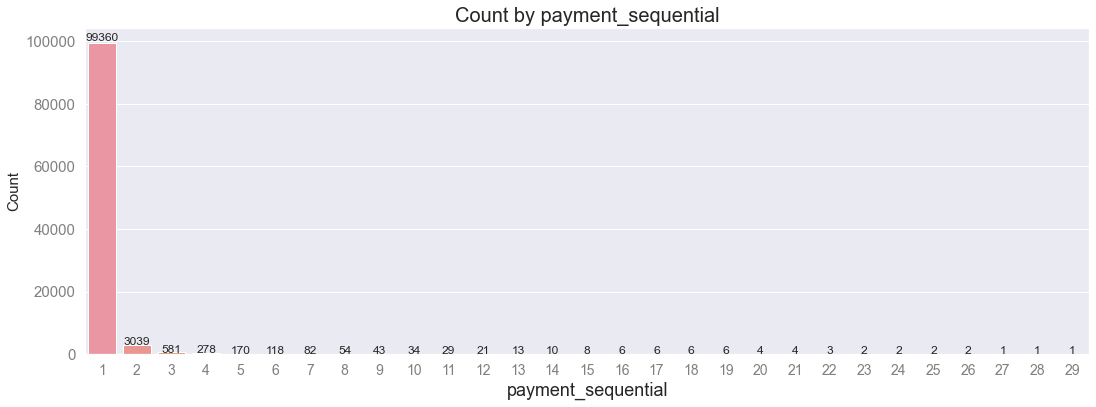

In [89]:
# Count plot for payment_sequential

plt.figure(figsize = (18,6))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "payment_sequential", 
                  data = order_payments)

plt.yticks(size = 15, color = 'grey')
plt.xticks(size = 14, color = 'grey')

plt.xlabel("payment_sequential", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count by payment_sequential", size = 20)

show_values(g);

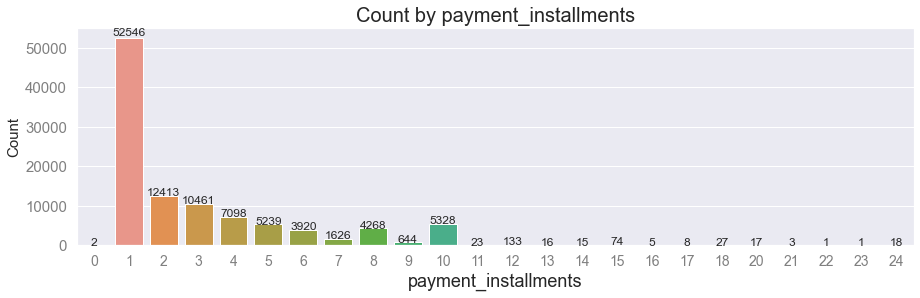

In [90]:
# Count plot for payment installment

plt.figure(figsize = (15,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "payment_installments", 
                  data = order_payments)

plt.yticks(size = 15, color = 'grey')
plt.xticks(size = 14, color = 'grey')

plt.xlabel("payment_installments",  size = 18)
plt.ylabel("Count",  size = 15)

plt.title("Count by payment_installments", size = 20)

show_values(g);

In [91]:
# Number of payments by payment_type
order_payments['payment_type'].value_counts().to_dict()

{'credit_card': 76795,
 'boleto': 19784,
 'voucher': 5775,
 'debit_card': 1529,
 'not_defined': 3}

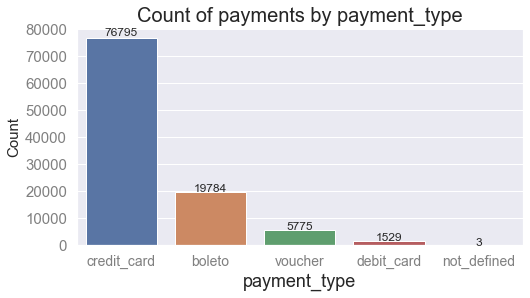

In [92]:
# Count plot of payments by payment_type

plt.figure(figsize = (8,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "payment_type", 
                  data = order_payments)

plt.yticks(size = 15, color = 'grey')
plt.xticks(size = 14, color = 'grey')

plt.xlabel("payment_type",  size = 18)
plt.ylabel("Count",  size = 15)

plt.title("Count of payments by payment_type", size = 20)

show_values(g);

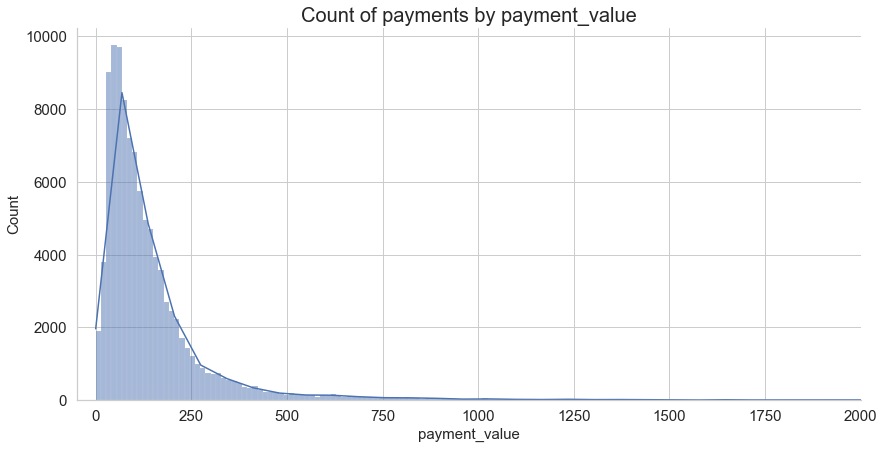

In [93]:
# Displot of payment_value

sns.set_theme(style = "whitegrid")

sns.displot(order_payments, 
            x = "payment_value", 
            bins = 1000, 
            kde = True, 
            height = 6, 
            aspect = 2)

plt.yticks(size = 15)
plt.xticks(size = 15)

plt.xlabel("payment_value", size = 15)
plt.ylabel("Count", size = 15)

plt.xlim(-50, 2000)

plt.title("Count of payments by payment_value", size = 20);

### Conlusions for dataset 'order_payments'
- features do not seem essential for the survey

## 1) f) Dataset 'order_items'

In [94]:
order_items.head(10)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
5  00048cc3ae777c65dbb7d2a0634bc1ea              1   
6  00054e8431b9d7675808bcb819fb4a32              1   
7  000576fe39319847cbb9d288c5617fa6              1   
8  0005a1a1728c9d785b8e2b08b904576c              1   
9  0005f50442cb953dcd1d21e1fb923495              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
5  ef92defde845ab8450f9d70c526ef70f  6426d21aca402a131fc0a5d0960a3c90   
6  8d4f2bb7e93e6710a28f34fa83ee7d28  7040e82f899a04d1b434b795a43b4617   
7  557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
8  310ae3c140ff94b03219ad0adc3c778f  a416b6a846a11724393025641d4edd5e   
9  4535b0e1091c278dfd193e5a1d63b39f  ba143b05f0110f0dc71ad71b4466ce92   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14  
5  2017-05-23 03:55:27   21.90          12.69  
6  2017-12-14 12:10:31   19.90          11.85  
7  2018-07-10 12:30:45  810.00          70.75  
8  2018-03-26 18:31:29  145.95          11.65  
9  2018-07-06 14:10:56   53.99          11.40

In [95]:
order_items.shape

(112650, 7)

In [96]:
order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [97]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [98]:
# Duplicates?
order_items.duplicated().sum()

0

In [99]:
order_items.duplicated('order_id').sum()

13984

In [100]:
# Creating dataframe order_items only with 'order_id' duplicates
df_items_duplicates = order_items.loc[order_items['order_id'].duplicated(keep = False) == True]
df_items_duplicates = df_items_duplicates.sort_values(by = 'order_id')
df_items_duplicates.shape

(23787, 7)

In [101]:
df_items_duplicates.head(10)

order_id  order_item_id  \
13  0008288aa423d2a3f00fcb17cd7d8719              1   
14  0008288aa423d2a3f00fcb17cd7d8719              2   
32  00143d0f86d6fbd9f9b38ab440ac16f5              1   
33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34  00143d0f86d6fbd9f9b38ab440ac16f5              3   
42  001ab0a7578dd66cd4b0a71f5b6e1e41              1   
43  001ab0a7578dd66cd4b0a71f5b6e1e41              2   
44  001ab0a7578dd66cd4b0a71f5b6e1e41              3   
49  001d8f0e34a38c37f7dba2a37d4eba8b              2   
48  001d8f0e34a38c37f7dba2a37d4eba8b              1   

                          product_id                         seller_id  \
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
33  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
42  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
43  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
44  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
49  e67307ff0f15ade43fcb6e670be7a74c  f4aba7c0bca51484c30ab7bdc34bcdd1   
48  e67307ff0f15ade43fcb6e670be7a74c  f4aba7c0bca51484c30ab7bdc34bcdd1   

    shipping_limit_date  price  freight_value  
13  2018-02-21 02:55:52  49.90          13.37  
14  2018-02-21 02:55:52  49.90          13.37  
32  2017-10-20 16:07:52  21.33          15.10  
33  2017-10-20 16:07:52  21.33          15.10  
34  2017-10-20 16:07:52  21.33          15.10  
42  2018-01-04 02:33:42  24.89          17.63  
43  2018-01-04 02:33:42  24.89          17.63  
44  2018-01-04 02:33:42  24.89          17.63  
49  2017-05-18 17:35:11  18.99           7.78  
48  2017-05-18 17:35:11  18.99           7.78

In [102]:
order_items.duplicated('product_id').sum()

79699

In [103]:
order_items.duplicated('seller_id').sum()

109555

In [104]:
len(order_items['seller_id'].unique().tolist())

3095

In [105]:
# Count number of order_id with several products
len(df_items_duplicates['order_id'].unique().tolist())

9803

### Conclusion for dataset 'order_items'
- feature 'price' will be used to calculate a new feature 'payments_total'

## 1) g) Dataset 'geolocation'

In [106]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [107]:
geolocation.shape

(1000163, 5)

In [108]:
geolocation.loc[geolocation['geolocation_state'] != 'SP']

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
22261                           2116       -23.515978       -46.582170   
72852                           4011       -23.578707       -46.645779   
404270                         20010       -22.902472       -43.174059   
404271                         20011       -22.904813       -43.176236   
404272                         20021       -22.909710       -43.171322   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
22261          são paulo                RN  
72852          sao paulo                AC  
404270    rio de janeiro                RJ  
404271    rio de janeiro                RJ  
404272    rio de janeiro                RJ  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[595895 rows x 5 columns]

### Conclusion for the dataset 'geolocation'
- this dataset will not be uses for this survey

## 1) h) Dataset 'customers'

In [109]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [110]:
customers.shape

(99441, 5)

In [111]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [112]:
# Duplicates ?
customers.duplicated().sum()

0

In [113]:
customers.duplicated('customer_id').sum()

0

In [114]:
customers.duplicated('customer_unique_id').sum()

3345

In [115]:
number_of_purchases = customers[['customer_id', 'customer_unique_id']].groupby('customer_unique_id').count()
number_of_purchases.sort_values('customer_id')

customer_id
customer_unique_id                           
0000366f3b9a7992bf8c76cfdf3221e2            1
a926cfc9bc7b082335de50450f48eec9            1
a926aae38267e7f54e67de9b5775d0a5            1
a92605ec492805540520d3a73aaeeb6e            1
a925c3e5df82fdc6082f1383d2834998            1
...                                       ...
ca77025e7201e3b30c44b472ff346268            7
6469f99c1f9dfae7733b25662e7f1782            7
1b6c7548a2a1f9037c1fd3ddfed95f33            7
3e43e6105506432c953e165fb2acf44c            9
8d50f5eadf50201ccdcedfb9e2ac8455           17

[96096 rows x 1 columns]

In [116]:
# Number of purchases > 1
(number_of_purchases['customer_id']>1).sum()

2997

In [117]:
# Number of customers by number of purchases
number_of_purchases.value_counts()

customer_id
1              93099
2               2745
3                203
4                 30
5                  8
6                  6
7                  3
9                  1
17                 1
dtype: int64

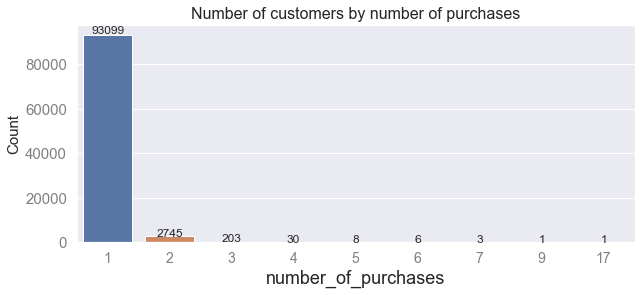

In [118]:
# Number of customers by number of purchases

plt.figure(figsize = (10,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "customer_id", 
                  data = number_of_purchases)

plt.yticks(size = 15, color = 'grey')
plt.xticks(size = 14, color = 'grey')

plt.xlabel("number_of_purchases", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Number of customers by number of purchases", fontsize = 16)

show_values(g);

In [119]:
# Create list with each customer
list_customer_unique_id = customers['customer_unique_id'].unique().tolist()

In [120]:
len(list_customer_unique_id)

96096

In [121]:
# percentage of customers who did several purchases :
(number_of_purchases['customer_id'] > 1).sum() / len(list_customer_unique_id) * 100

3.1187562437562435

### Conclusions for the dataset 'customers'
- Only 3.1 % of customers ordered more than once

## 1) i) Dataset 'translation'

In [122]:
translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [123]:
translation.shape

(71, 2)

In [124]:
orders_order_reviews.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'review_id', 'review_score', 'review_comment_message',
       'review_creation_date'],
      dtype='object')

# 2) Creating dataframe orders_customers containing relevant features :

- customers : customer_id (key), customer_unique_id, customer_state, customer_zip_code_prefix (key)
- orders_order_reviews : order_id (key), customer_id (key), order_status, order_purchase_timestamp, review_id, review_score, review_comment_message
- order_items : order_id (key), order_item_id, product_id (key), seller_id (key), price, freight_value

## 2) a) Merge datasets

In [125]:
# Merge datasets 'orders_order_reviews' and "customer" and with relevant features
orders_customers = pd.merge(orders_order_reviews[['order_id',
                                                  'customer_id',
                                                  'order_status',
                                                  'order_purchase_timestamp',
                                                  'review_id', 
                                                  'review_score', 
                                                  'review_comment_message']],
                           customers[['customer_id',
                                      'customer_unique_id',
                                      'customer_state',
                                      'customer_zip_code_prefix']])

# Merge datasets 'orders_customers' and 'order_items' with relevant features
orders_customers = pd.merge(orders_customers,
                            order_items[['order_id',
                                         'order_item_id',
                                         'product_id',
                                         'seller_id',
                                         'price',
                                         'freight_value']])

In [126]:
orders_customers.shape

(111708, 15)

In [127]:
orders_customers.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
review_id                   0
review_score                0
review_comment_message      0
customer_unique_id          0
customer_state              0
customer_zip_code_prefix    0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
dtype: int64

In [128]:
orders_customers.head()

order_id                       customer_id  \
0  c3a4dcc5c4ae575cb04444cf1b3f0a09  4f24efa07ad431bbb04c7f1eb54a19bf   
1  748db62700c925a0db2c4b00ee25849c  d065739818d474d19dfdb51d54c0a1e9   
2  9e49e81744d0890cd05aeb8d8c10d28a  3771914eaea4a652b9eda2ad97add048   
3  a2e9aa14d517e240f6e7c7243dc1f639  546c4d8cb9e45e600960e1b04f49db65   
4  cd5343ffb012a7157ddbcf5720100c01  c6ae270b58b4692321a73aa741d183af   

  order_status order_purchase_timestamp                         review_id  \
0    delivered      2018-08-26 19:56:12  36a152002b9582c0fc15289c844ec53d   
1    delivered      2018-08-25 11:24:40  3e8a6b00ddbf02e6dc77b123e46c5573   
2    delivered      2018-08-21 13:32:24  d647e13487e7f828f9ed6a8e72de0c6a   
3    delivered      2018-08-14 12:28:49  8c9557936286091faaf737133f68d287   
4    delivered      2018-08-26 12:38:57  05d3874965dd1ba4330bab86c5fff9aa   

   review_score  \
0             5   
1             5   
2             5   
3             4   
4             1   

                                                                                review_comment_message  \
0                                                                                                 None   
1                                                                                                 None   
2                                                                                                 None   
3                                                                                                 None   
4  Fiz o pedido de dois kits de progressiva e só me foi entregue um \r\nO que eu faço agora para pe...   

                 customer_unique_id customer_state  customer_zip_code_prefix  \
0  8c446b198f0c92d5db58d3c8eacd3a11             PR                     84500   
1  b0df0c28ffa58ea9035f06f993bc717a             MG                     37701   
2  5011569297e6d342cc04f51f923409d6             MG                     30535   
3  0dab841685c250499b36d81dbb570ab8             MA                     65302   
4  4d7b6c39aa3c7b53acb8058e4094a593             SP                      5187   

   order_item_id                        product_id  \
0              1  391ae69031bcca826279a84f5c4034e8   
1              1  306b0c58328826c0564cbc520787d508   
2              1  4f00b2fac67879a28298642092faa414   
3              1  f9b178c9fdc90bbcfbd6c6b49ed47d4c   
4              1  54f45413afc0d5480c59f5dfeed2d19f   

                          seller_id  price  freight_value  
0  fffd5413c0700ac820c7069d66d98c89  196.8          42.36  
1  7ad32824caee82087b3e2e5f33b1bf32   89.0          23.42  
2  6c177e38df6d3f34182b1f1d427231bf  250.0          19.90  
3  1025f0e2d44d7041d6cf58b6550e0bfa   70.0          57.26  
4  5ab05b6d86d417796c69ffd6774ec832  149.9          18.18

## 2) b) feature engineering

### New feature : review comment

In [129]:
# Creating new feature :
# review_comment = 1 if there is a review_comment_message
# review_comment = 0 if there is not
orders_customers['review_comment'] = (orders_customers['review_comment_message'] != 'None').astype(int)

### New feature : delivery

In [130]:
# Creating new feature :
# delivery = 1 if order_status == delivered
# delivery = 0 if order_status != delivered
orders_customers['delivery'] = (orders_customers['order_status'] == 'delivered').astype(int)

### New feature : last_order_days (time from last order to today in days)

In [131]:
orders_customers.dtypes

order_id                     object
customer_id                  object
order_status                 object
order_purchase_timestamp     object
review_id                    object
review_score                  int64
review_comment_message       object
customer_unique_id           object
customer_state               object
customer_zip_code_prefix      int64
order_item_id                 int64
product_id                   object
seller_id                    object
price                       float64
freight_value               float64
review_comment                int32
delivery                      int32
dtype: object

In [132]:
# Change dtypes 'object' to 'datetime'
orders_customers['order_purchase_timestamp'] = pd.to_datetime(orders_customers['order_purchase_timestamp'])

# Calculate duration between today and order_purchase_timestamp
orders_customers['last_order'] = (datetime.now() - orders_customers['order_purchase_timestamp'])

# Keep number of days only
orders_customers['last_order_days'] = orders_customers['last_order'].astype(str).str[:4].astype(int)

In [133]:
orders_customers.dtypes

order_id                             object
customer_id                          object
order_status                         object
order_purchase_timestamp     datetime64[ns]
review_id                            object
review_score                          int64
review_comment_message               object
customer_unique_id                   object
customer_state                       object
customer_zip_code_prefix              int64
order_item_id                         int64
product_id                           object
seller_id                            object
price                               float64
freight_value                       float64
review_comment                        int32
delivery                              int32
last_order                  timedelta64[ns]
last_order_days                       int32
dtype: object

In [134]:
# Select relevant features for the survey
orders_customers = orders_customers[['order_id',
                                     'customer_id',
                                     'customer_unique_id',
                                     'order_status',
                                     'delivery',
                                     'order_purchase_timestamp',
                                     'last_order',
                                     'last_order_days',
                                     'product_id',
                                     'order_item_id',
                                     'price',
                                     'freight_value',
                                     'review_id',
                                     'review_score',
                                     'review_comment',
                                     'review_comment_message',
                                     'customer_state',
                                     'customer_zip_code_prefix',
                                     'seller_id']]

In [135]:
# Merge with 'sellers' dataset
orders_customers_sellers = pd.merge(orders_customers, sellers)
ocs = orders_customers_sellers

### Splitting dataframe into 2 dataframes :
- customers who ordered just 1 product in 1 purchase
- customers who ordered several products in 1 purchase and customers with more than 1 purchase

In [136]:
ocs.shape

(111708, 22)

In [137]:
ocs.head()

order_id                       customer_id  \
0  c3a4dcc5c4ae575cb04444cf1b3f0a09  4f24efa07ad431bbb04c7f1eb54a19bf   
1  f57983ca82e3c9bb09abcdda9139de70  d77129c07a09045897df7b1ecf5b85dc   
2  30a2f24dd6770c91faa6b3481319204b  de2d4a479a79d4d85c9ce01caf804937   
3  41d0cc817d720d7f3860716b335a3cb7  0c045d9e471667c05202939897cde7bc   
4  633500d08d4de68291b91ac828ef3961  749d4a25eb7bd33a4a39b0b106125744   

                 customer_unique_id order_status  delivery  \
0  8c446b198f0c92d5db58d3c8eacd3a11    delivered         1   
1  0c7f5da7d9d33d16ddc25dfafcc513ce    delivered         1   
2  8b27e23ca14dc7d4d8e429abda30b5fb    delivered         1   
3  3c068da825c04776514f05089b83ef6b    delivered         1   
4  3cc1026f5863d3b5fc44bd92bad50cee    delivered         1   

  order_purchase_timestamp                last_order  last_order_days  \
0      2018-08-26 19:56:12 1275 days 18:45:00.436418             1275   
1      2018-08-11 20:50:44 1290 days 17:50:28.436418             1290   
2      2018-08-08 11:48:41 1294 days 02:52:31.436418             1294   
3      2018-08-05 00:46:46 1297 days 13:54:26.436418             1297   
4      2018-07-25 12:56:05 1308 days 01:45:07.436418             1308   

                         product_id  order_item_id  price  freight_value  \
0  391ae69031bcca826279a84f5c4034e8              1  196.8          42.36   
1  8273821fd2a32fbbc77ad8b743b2a1b9              1   89.0          24.70   
2  ebb12274522d82caa7dca657873b2ad7              1   99.8          39.78   
3  ebb12274522d82caa7dca657873b2ad7              1   99.8          32.09   
4  f74979233a273e0afadf48e39d0c45a4              1   94.6          36.01   

                          review_id  review_score  review_comment  \
0  36a152002b9582c0fc15289c844ec53d             5               0   
1  1fa8330a0ff58acf91876225c9d1974d             5               1   
2  13548d0f62b03a0d3cb6efc00877fa13             5               0   
3  c6217f72e7cc770cf87850f919db81fb             5               0   
4  8af3bbca529461225450b7d51357ba9c             5               0   

                                                                                review_comment_message  \
0                                                                                                 None   
1  Equipe baratheon está de parabéns !!! Comparei mais vezes indicarei para as pessoas que conheço ...   
2                                                                                                 None   
3                                                                                                 None   
4                                                                                                 None   

  customer_state  customer_zip_code_prefix                         seller_id  \
0             PR                     84500  fffd5413c0700ac820c7069d66d98c89   
1             SP                      3431  fffd5413c0700ac820c7069d66d98c89   
2             SP                      7700  fffd5413c0700ac820c7069d66d98c89   
3             SP                     13033  fffd5413c0700ac820c7069d66d98c89   
4             RS                     90420  fffd5413c0700ac820c7069d66d98c89   

   seller_zip_code_prefix seller_city seller_state  
0                   13908      amparo           SP  
1                   13908      amparo           SP  
2                   13908      amparo           SP  
3                   13908      amparo           SP  
4                   13908      amparo           SP

In [138]:
# Creating dataframe with no duplicates (1 product per purchase (only 1 purchase) for each customer): 
# Dropping all 'customer_unique_id" duplicates
df_no_duplicates = ocs.drop_duplicates(subset = ['customer_unique_id'],
                                       keep = False)
df_no_duplicates.shape

(82993, 22)

In [139]:
# Creating dataframe only with duplicates (several products and several purchases)
df_duplicates = ocs.loc[orders_customers_sellers['customer_unique_id'].duplicated(keep = False) == True]
df_duplicates.shape

(28715, 22)

### Preparing dataframe with only 1 product ordered for each customer

In [140]:
# Select relevant features for the survey
df_no_duplicates = df_no_duplicates[['customer_unique_id',
                                     'delivery',
                                     'order_purchase_timestamp',
                                     'last_order_days',
                                     'price',
                                     'review_score',
                                     'review_comment']]

In [141]:
# Change names of features
df_no_duplicates = df_no_duplicates.rename(columns={'customer_unique_id' : 'Customer',
                                                    'delivery' : 'deliveries',
                                                    'price' : 'payments_total',
                                                    'review_score' : 'review_score_mean',
                                                    'review_comment' : 'number_of_review_comments'})

# Create new feature : number of purchases
df_no_duplicates['number_of_purchases'] = 1

# Create new feature : number of product by purchases
df_no_duplicates['Number_of_products'] = 1

# Create new feature : percentage of deliveries
df_no_duplicates['percentage_deliveries'] = (df_no_duplicates['deliveries']
                                             / df_no_duplicates['number_of_purchases']
                                             * 100)

# Create new feature : percentage of review comments
df_no_duplicates['percentage_of_review_comments'] = (df_no_duplicates['number_of_review_comments']
                                                  / df_no_duplicates['number_of_purchases']
                                                  * 100)

# Create new feature : mean_payment_by_purchase
df_no_duplicates['mean_payment_by_purchase'] = (df_no_duplicates['payments_total']
                                                / df_no_duplicates['number_of_purchases'])

In [142]:
df_no_duplicates.columns

Index(['Customer', 'deliveries', 'order_purchase_timestamp', 'last_order_days',
       'payments_total', 'review_score_mean', 'number_of_review_comments',
       'number_of_purchases', 'Number_of_products', 'percentage_deliveries',
       'percentage_of_review_comments', 'mean_payment_by_purchase'],
      dtype='object')

In [143]:
df_no_duplicates

Customer  deliveries order_purchase_timestamp  \
0       8c446b198f0c92d5db58d3c8eacd3a11           1      2018-08-26 19:56:12   
1       0c7f5da7d9d33d16ddc25dfafcc513ce           1      2018-08-11 20:50:44   
2       8b27e23ca14dc7d4d8e429abda30b5fb           1      2018-08-08 11:48:41   
3       3c068da825c04776514f05089b83ef6b           1      2018-08-05 00:46:46   
4       3cc1026f5863d3b5fc44bd92bad50cee           1      2018-07-25 12:56:05   
...                                  ...         ...                      ...   
111702  b39c8c284dd7875b68a31449852cc76a           1      2016-10-06 22:34:03   
111703  01f156677184504063bd19739f924af1           1      2016-10-10 13:57:41   
111704  517a3d8518447c776efd430b66470e27           1      2016-10-05 22:24:40   
111706  24c0806a2407ad1f14b1323849bd246c           1      2016-10-06 13:16:56   
111707  2e92a624a8a3f8ab5eb51d42fca60e5b           1      2016-10-06 20:06:26   

        last_order_days  payments_total  review_score_mean  \
0                  1275          196.80                  5   
1                  1290           89.00                  5   
2                  1294           99.80                  5   
3                  1297           99.80                  5   
4                  1308           94.60                  5   
...                 ...             ...                ...   
111702             1964           79.99                  3   
111703             1961          739.98                  5   
111704             1965          248.00                  4   
111706             1965           25.90                  4   
111707             1964           39.90                  4   

        number_of_review_comments  number_of_purchases  Number_of_products  \
0                               0                    1                   1   
1                               1                    1                   1   
2                               0                    1                   1   
3                               0                    1                   1   
4                               0                    1                   1   
...                           ...                  ...                 ...   
111702                          1                    1                   1   
111703                          0                    1                   1   
111704                          1                    1                   1   
111706                          1                    1                   1   
111707                          0                    1                   1   

        percentage_deliveries  percentage_of_review_comments  \
0                       100.0                            0.0   
1                       100.0                          100.0   
2                       100.0                            0.0   
3                       100.0                            0.0   
4                       100.0                            0.0   
...                       ...                            ...   
111702                  100.0                          100.0   
111703                  100.0                            0.0   
111704                  100.0                          100.0   
111706                  100.0                          100.0   
111707                  100.0                            0.0   

        mean_payment_by_purchase  
0                         196.80  
1                          89.00  
2                          99.80  
3                          99.80  
4                          94.60  
...                          ...  
111702                     79.99  
111703                    739.98  
111704                    248.00  
111706                     25.90  
111707                     39.90  

[82993 rows x 12 columns]

In [144]:
df_no_duplicates.describe()

deliveries  last_order_days  payments_total  review_score_mean  \
count  82993.000000     82993.000000    82993.000000       82993.000000   
mean       0.978215      1511.220585      131.300613           4.156122   
std        0.145982       153.487839      198.447533           1.285786   
min        0.000000      1272.000000        0.850000           1.000000   
25%        1.000000      1387.000000       44.890000           4.000000   
50%        1.000000      1492.000000       79.990000           5.000000   
75%        1.000000      1621.000000      144.990000           5.000000   
max        1.000000      1996.000000     6735.000000           5.000000   

       number_of_review_comments  number_of_purchases  Number_of_products  \
count               82993.000000              82993.0             82993.0   
mean                    0.400745                  1.0                 1.0   
std                     0.490052                  0.0                 0.0   
min                     0.000000                  1.0                 1.0   
25%                     0.000000                  1.0                 1.0   
50%                     0.000000                  1.0                 1.0   
75%                     1.000000                  1.0                 1.0   
max                     1.000000                  1.0                 1.0   

       percentage_deliveries  percentage_of_review_comments  \
count           82993.000000                   82993.000000   
mean               97.821503                      40.074464   
std                14.598165                      49.005231   
min                 0.000000                       0.000000   
25%               100.000000                       0.000000   
50%               100.000000                       0.000000   
75%               100.000000                     100.000000   
max               100.000000                     100.000000   

       mean_payment_by_purchase  
count              82993.000000  
mean                 131.300613  
std                  198.447533  
min                    0.850000  
25%                   44.890000  
50%                   79.990000  
75%                  144.990000  
max                 6735.000000

### Preparing dataframe with more than 1 product ordered in 1 purchases for each customer

In [145]:
df_duplicates = df_duplicates.sort_values(by = 'customer_unique_id')
df_duplicates.head(10)

order_id                       customer_id  \
18310  44e608f2db00c74a1fe329de44416a4e  a81ebb9b32f102298c0c89635b4b3154   
18311  44e608f2db00c74a1fe329de44416a4e  a81ebb9b32f102298c0c89635b4b3154   
24208  c6d61340bd8baeedca7cc8e7f7ec07e9  455f2e2988eaf87d7e2ba33b0a57969f   
24209  c6d61340bd8baeedca7cc8e7f7ec07e9  455f2e2988eaf87d7e2ba33b0a57969f   
81973  87440e08790d85796f5b8bc9f5ed2707  4b95f958af9c866353ae1108d8ebd023   
81974  87440e08790d85796f5b8bc9f5ed2707  4b95f958af9c866353ae1108d8ebd023   
64099  87440e08790d85796f5b8bc9f5ed2707  4b95f958af9c866353ae1108d8ebd023   
64098  87440e08790d85796f5b8bc9f5ed2707  4b95f958af9c866353ae1108d8ebd023   
3974   533dbcda0a703be171113573af8b3467  5247e5c7e9037e74343f13bbd8800a6a   
3975   533dbcda0a703be171113573af8b3467  5247e5c7e9037e74343f13bbd8800a6a   

                     customer_unique_id order_status  delivery  \
18310  00053a61a98854899e70ed204dd4bafe    delivered         1   
18311  00053a61a98854899e70ed204dd4bafe    delivered         1   
24208  000de6019bb59f34c099a907c151d855    delivered         1   
24209  000de6019bb59f34c099a907c151d855    delivered         1   
81973  000fbf0473c10fc1ab6f8d2d286ce20c    delivered         1   
81974  000fbf0473c10fc1ab6f8d2d286ce20c    delivered         1   
64099  000fbf0473c10fc1ab6f8d2d286ce20c    delivered         1   
64098  000fbf0473c10fc1ab6f8d2d286ce20c    delivered         1   
3974   001147e649a7b1afd577e873841632dd    delivered         1   
3975   001147e649a7b1afd577e873841632dd    delivered         1   

      order_purchase_timestamp                last_order  last_order_days  \
18310      2018-02-28 11:15:41 1455 days 03:25:31.436418             1455   
18311      2018-02-28 11:15:41 1455 days 03:25:31.436418             1455   
24208      2017-08-17 19:10:33 1649 days 19:30:39.436418             1649   
24209      2017-08-17 19:10:33 1649 days 19:30:39.436418             1649   
81973      2018-07-26 09:43:52 1307 days 04:57:20.436418             1307   
81974      2018-07-26 09:43:52 1307 days 04:57:20.436418             1307   
64099      2018-07-26 09:43:52 1307 days 04:57:20.436418             1307   
64098      2018-07-26 09:43:52 1307 days 04:57:20.436418             1307   
3974       2017-08-31 17:12:56 1635 days 21:28:16.436418             1635   
3975       2017-08-31 17:12:56 1635 days 21:28:16.436418             1635   

                             product_id  order_item_id   price  freight_value  \
18310  62984ea1bba7fcea1f5b57084d3bf885              1  191.00          18.59   
18311  58727e154e8e85d84052cd22b0136c84              2  191.00          18.59   
24208  af0a917aec9cea3b353ece61a8825326              1   89.90          10.31   
24209  9e572ff4654f7064419d97a891a8b0fc              2  139.90          17.33   
81973  38021cef829efa264df6f9d21c4df6e9              1  119.87          19.14   
81974  38021cef829efa264df6f9d21c4df6e9              2  119.87          19.14   
64099  d7a3cfa08519494aa1ad181e803617ec              4   23.03          19.14   
64098  d7a3cfa08519494aa1ad181e803617ec              3   23.03          19.14   
3974   bdb4be6ce2f7f2b5be0a16088028c7fc              1   85.00          21.08   
3975   bdb4be6ce2f7f2b5be0a16088028c7fc              2   85.00          21.08   

                              review_id  review_score  review_comment  \
18310  333a6ca3cdb01f5f00e3e6be1f1236e1             1               1   
18311  333a6ca3cdb01f5f00e3e6be1f1236e1             1               1   
24208  49af8d8f5a31674c3474ab9ea125db04             2               1   
24209  49af8d8f5a31674c3474ab9ea125db04             2               1   
81973  b6ebd8ff503e058bc1205ee501274c1a             5               0   
81974  b6ebd8ff503e058bc1205ee501274c1a             5               0   
64099  b6ebd8ff503e058bc1205ee501274c1a             5               0   
64098  b6ebd8ff503e058bc1205ee501274c1a             5               0   
3974   904cc5ac1727c1509686adc76e267776             4      

In [146]:
# Calculate the number of products ordered by a single customer -> to dictionnary
dict_numb_of_prod = df_duplicates['customer_unique_id'].value_counts().to_dict()
dict_numb_of_prod

{'c8460e4251689ba205045f3ea17884a1': 24,
 '4546caea018ad8c692964e3382debd19': 21,
 'c402f431464c72e27330a67f7b94d4fb': 20,
 '0f5ac8d5c31de21d2f25e24be15bbffb': 18,
 '8d50f5eadf50201ccdcedfb9e2ac8455': 16,
 'eae0a83d752b1dd32697e0e7b4221656': 15,
 '11f97da02237a49c8e783dfda6f50e8e': 15,
 '31e412b9fb766b6794724ed17a41dfa6': 14,
 'f7ea4eef770a388bd5b225acfc546604': 14,
 '3e43e6105506432c953e165fb2acf44c': 14,
 '7582a5a77fc2976628f46a13ec91b375': 13,
 'd97b3cfb22b0d6b25ac9ed4e9c2d481b': 13,
 '86df00dc5fd68f4dd5d5945ca19f3ed6': 12,
 '9eca552063680b7cd2ed0e8aea002b21': 12,
 'd3383e8df3cd44cd351aecff92e34627': 12,
 '37bc3d463e2a0024012a7fa587597a3c': 12,
 '4d99682572b7b5932340a0bce676c18c': 12,
 'ce9f8b9c31d83341764708396ac7e38b': 12,
 '4644f1b187e390a08b4c66fb16c91364': 12,
 'ca77025e7201e3b30c44b472ff346268': 12,
 '07ff81a9676efa0286ddd3f09e7c0063': 12,
 'efce1ab3e96ccab8b1b464326bd22417': 11,
 'a5d3bfee5b23b430b95c4ae295e1028a': 11,
 'dc813062e0fc23409cd255f7f53c7074': 11,
 '33176de67c05ee

In [147]:
# Create new dataframe with the number of ordered products
df_numb_of_prod = pd.DataFrame(list(dict_numb_of_prod.items()),
                   columns=['Customer', 'Number_of_products'])

In [148]:
# Select the date of the most recent purchase

# Sort by date and create new dataframe 'df_last_order'
df_last_order = df_duplicates.sort_values('order_purchase_timestamp',
                                          ascending = False)

# Keep the line of the customer with the most recent date
df_last_order = df_last_order.drop_duplicates(subset = ['customer_unique_id'],
                                              keep = 'first')

In [149]:
# Rename columns 'customer_unique_id'
df_last_order = df_last_order.rename(columns={'customer_unique_id' : 'Customer'})

# Keep only chosen features
df_last_order = df_last_order[['Customer',
                               'order_purchase_timestamp',
                               'last_order_days']]

# Merge df_last_order and df_numb_of_prod
df = pd.merge(df_last_order, df_numb_of_prod)

In [150]:
# Calculate 'payments_total' for each customer

# Save index for the column "price" in dataframe df_duplicates
index_price = df_duplicates.columns.get_loc('price')
# Create list of customer_unique_id
list_customer_unique_id = df_duplicates['customer_unique_id'].unique().tolist()

# Create new column "payments_total" in df
df["payments_total"] = 0
# Save index for the column "payments_total" in dataframe df
index_payments_total = df.columns.get_loc('payments_total')

# Reset index of dataset df_duplicates
df_duplicates = df_duplicates.reset_index(drop = True)

for customer in list_customer_unique_id:
    # Save list of indexes corresponding to the same customer in df_duplicates
    index_list = df_duplicates.loc[df_duplicates['customer_unique_id'] == customer].index
    # Save index of customer in df
    index_customer = df.loc[df['Customer'] == customer].index
    # Add prices for each customers to obtain 'payment_total'
    df.iloc[index_customer, index_payments_total] = df_duplicates.iloc[index_list, index_price].sum()

In [151]:
# Calculate 'number of purchases' for each customer

# Create list of customer_unique_id
list_customer_unique_id = df_duplicates['customer_unique_id'].unique().tolist()

# Create new column "number_of_purchases" in df
df["number_of_purchases"] = 0
# Save index for the column "number_of_purchases" in dataframe df
index_number_of_purchases = df.columns.get_loc('number_of_purchases')

for customer in list_customer_unique_id:
    # Save index of customer in df
    index_customer = df.loc[df['Customer'] == customer].index
    # Create dataframe for each customer
    df_customer = df_duplicates.loc[df_duplicates['customer_unique_id'] == customer]
    # Add number_of_purchases for each customers
    df.iloc[index_customer, index_number_of_purchases] = len(df_customer['order_id'].unique().tolist())

In [152]:
# Calculate 'mean_payment_by_purchase'
df['mean_payment_by_purchase'] = (df['payments_total']
                                  / df['number_of_purchases'])

In [153]:
# Calculate 'number_of_review_comments' for each customer

# Create list of customer_unique_id
list_customer_unique_id = df_duplicates['customer_unique_id'].unique().tolist()

# Create new column "number_of_review_comments" in df
df["number_of_review_comments"] = 0
# Save index for the column "number_of_review_comments" in dataframe df
index_number_of_review_comments = df.columns.get_loc('number_of_review_comments')

for customer in list_customer_unique_id:
    # Save index of customer in df
    index_customer = df.loc[df['Customer'] == customer].index
    # Create dataframe for each customer
    df_customer = df_duplicates.loc[df_duplicates['customer_unique_id'] == customer]    
    # Add number_of_review_comment for each customer
    df.iloc[index_customer, index_number_of_review_comments] = len(df_customer['order_id'].unique().tolist())

In [154]:
# Calculate 'percentage_of_review_comments' for each customer
df['percentage_of_review_comments'] = (df['number_of_review_comments']
                                       / df['number_of_purchases']
                                       * 100)

In [155]:
# Calculate 'review_score_mean' for each customer

# Create list of customer_unique_id
list_customer_unique_id = df_duplicates['customer_unique_id'].unique().tolist()

# Create new column "review_score_mean" in df
df["review_score_mean"] = 0
# Save index for the column "review_score_mean" in dataframe df
index_review_score_mean = df.columns.get_loc('review_score_mean')

for customer in list_customer_unique_id:
    # Save index of customer in df
    index_customer = df.loc[df['Customer'] == customer].index
    # Create dataframe for each customer
    df_customer = df_duplicates.loc[df_duplicates['customer_unique_id'] == customer]        
    # Calculate the mean of review_scores for each customers to obtain 'review_score_mean'
    df.iloc[index_customer, index_review_score_mean] = df_customer['review_score'].mean()

In [156]:
# Calculate number_of_deliveries as 'deliveries' for each customer

# Create list of customer_unique_id
list_customer_unique_id = df_duplicates['customer_unique_id'].unique().tolist()

# Create new column "deliveries" in df
df["deliveries"] = 0
# Save index for the column "deliveries" in dataframe df
index_deliveries = df.columns.get_loc('deliveries')

for customer in list_customer_unique_id:
    # Save index of customer in df
    index_customer = df.loc[df['Customer'] == customer].index
    # Create dataframe for each customer
    df_customer = df_duplicates.loc[df_duplicates['customer_unique_id'] == customer]        
    # Calculate the sum of delivery column for each customers to obtain 'deliveries'
    df.iloc[index_customer, index_deliveries] = df_customer['delivery'].sum()

In [157]:
# Calculate percentage of deliveries
df['percentage_deliveries'] = (df['deliveries']
                               / df['Number_of_products']
                               * 100)

In [158]:
df.describe()

last_order_days  Number_of_products  payments_total  \
count     11728.000000        11728.000000    11728.000000   
mean       1507.706514            2.448414      219.126297   
std         150.858942            1.107691      305.039617   
min        1268.000000            2.000000        7.800000   
25%        1385.000000            2.000000       86.000000   
50%        1488.000000            2.000000      145.000000   
75%        1612.000000            2.000000      250.000000   
max        1996.000000           24.000000    13440.000000   

       number_of_purchases  mean_payment_by_purchase  \
count          11728.00000              11728.000000   
mean               1.27251                185.414997   
std                0.54122                275.113981   
min                1.00000                  5.990000   
25%                1.00000                 70.000000   
50%                1.00000                119.800000   
75%                1.00000                209.983750   
max               16.00000              13440.000000   

       number_of_review_comments  percentage_of_review_comments  \
count                11728.00000                        11728.0   
mean                     1.27251                          100.0   
std                      0.54122                            0.0   
min                      1.00000                          100.0   
25%                      1.00000                          100.0   
50%                      1.00000                          100.0   
75%                      1.00000                          100.0   
max                     16.00000                          100.0   

       review_score_mean    deliveries  percentage_deliveries  
count       11728.000000  11728.000000           11728.000000  
mean            3.718346      2.403223              98.205971  
std             1.537995      1.137070              12.386205  
min             1.000000      0.000000               0.000000  
25%             3.000000      2.000000             100.000000  
50%             4.000000      2.000000             100.000000  
75%             5.000000      2.000000             100.000000  
max             5.000000     24.000000             100.000000

### Concatenate dataframes 'df_no_duplicates' and 'df'

In [159]:
# Concatenate dataframes keeping only common features
data = pd.concat([df_no_duplicates, df], join = "inner", ignore_index=True)

In [160]:
# Sort values by 'order_purchase_timestamp'
data = data.sort_values(by = 'order_purchase_timestamp')
data

Customer  deliveries order_purchase_timestamp  \
94720  b7d76e111c89f7ebf14761390f0f7d17           0      2016-09-04 21:15:19   
62808  4854e9b3feff728c13ee5fc7d1547e92           0      2016-09-05 00:15:34   
94719  830d5b7aaa3b6f1e9ad63703bec97d23           3      2016-09-15 12:16:38   
70976  0eb1ee9dba87f5b36b4613a65074337c           0      2016-10-02 22:07:52   
82981  2f64e403852e6893ae37485d5fcacdaf           1      2016-10-03 16:56:50   
...                                 ...         ...                      ...   
82994  5c58de6fb80e93396e2f35642666b693           2      2018-08-29 14:18:23   
26504  7febafa06d9d8f232a900a2937f04338           1      2018-08-29 14:18:28   
24892  b701bebbdf478f5500348f03aff62121           1      2018-08-29 14:52:00   
7819   24ac2b4327e25baf39f2119e4228976a           1      2018-08-29 15:00:37   
82993  ff22e30958c13ffe219db7d711e8f564           0      2018-09-03 09:06:57   

       last_order_days  payments_total  review_score_mean  \
94720             1996           72.89                1.0   
62808             1996           59.50                1.0   
94719             1986          134.97                1.0   
70976             1968          100.00                1.0   
82981             1967           21.90                4.0   
...                ...             ...                ...   
82994             1273          418.00                5.0   
26504             1273           45.90                5.0   
24892             1272           24.90                3.0   
7819              1272           84.99                5.0   
82993             1268          290.00                1.0   

       number_of_review_comments  number_of_purchases  Number_of_products  \
94720                          1                    1                   2   
62808                          1                    1                   1   
94719                          1                    1                   3   
70976                          0                    1                   1   
82981                          1                    1                   1   
...                          ...                  ...                 ...   
82994                          1                    1                   2   
26504                          1                    1                   1   
24892                          0                    1                   1   
7819                           0                    1                   1   
82993                          2                    2                   2   

       percentage_deliveries  percentage_of_review_comments  \
94720                    0.0                          100.0   
62808                    0.0                          100.0   
94719                  100.0                          100.0   
70976                    0.0                            0.0   
82981                  100.0                          100.0   
...                      ...                            ...   
82994                  100.0                          100.0   
26504                  100.0                          100.0   
24892                  100.0                            0.0   
7819                   100.0                            0.0   
82993                    0.0                          100.0   

       mean_payment_by_purchase  
94720                     72.89  
62808                     59.50  
94719                    134.97  
70976                    100.00  
82981                     21.90  
...                         ...  
82994                    418.00  
26504                     45.90  
24892                     24.90  
7819                      84.99  
82993                    145.00  

[94721 rows x 12 columns]

In [161]:
# Save the final dataframe as 'data_clustering'
data_clustering = data.to_csv('data_clustering.csv', sep=';', index = False)

In [162]:
data.describe()

deliveries  last_order_days  payments_total  review_score_mean  \
count  94721.000000     94721.000000    94721.000000       94721.000000   
mean       1.154654      1510.785486      142.174861           4.101918   
std        0.631699       153.168372      216.476901           1.327476   
min        0.000000      1268.000000        0.850000           1.000000   
25%        1.000000      1387.000000       47.800000           4.000000   
50%        1.000000      1491.000000       89.800000           5.000000   
75%        1.000000      1620.000000      155.000000           5.000000   
max       24.000000      1996.000000    13440.000000           5.000000   

       number_of_review_comments  number_of_purchases  Number_of_products  \
count               94721.000000         94721.000000        94721.000000   
mean                    0.508683             1.033741            1.179337   
std                     0.573698             0.210527            0.616039   
min                     0.000000             1.000000            1.000000   
25%                     0.000000             1.000000            1.000000   
50%                     0.000000             1.000000            1.000000   
75%                     1.000000             1.000000            1.000000   
max                    16.000000            16.000000           24.000000   

       percentage_deliveries  percentage_of_review_comments  \
count           94721.000000                   94721.000000   
mean               97.869106                      47.494220   
std                14.343304                      49.937435   
min                 0.000000                       0.000000   
25%               100.000000                       0.000000   
50%               100.000000                       0.000000   
75%               100.000000                     100.000000   
max               100.000000                     100.000000   

       mean_payment_by_purchase  
count              94721.000000  
mean                 138.000854  
std                  210.222903  
min                    0.850000  
25%                   46.000000  
50%                   87.000000  
75%                  149.900000  
max                13440.000000

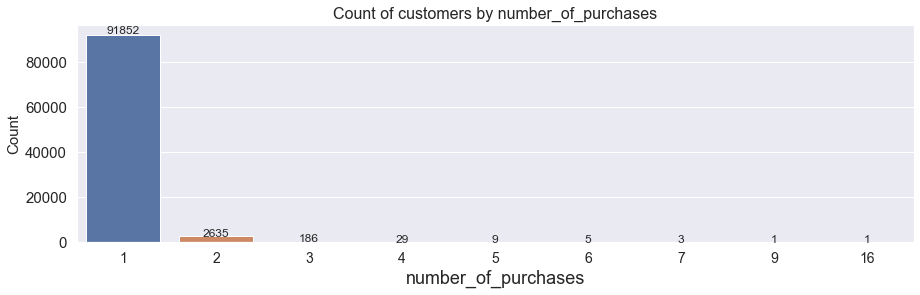

In [163]:
# Count number_of_purchases

plt.figure(figsize = (15,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "number_of_purchases", data = data)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14)

plt.xlabel("number_of_purchases",  size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of customers by number_of_purchases", fontsize = 16)

show_values(g);

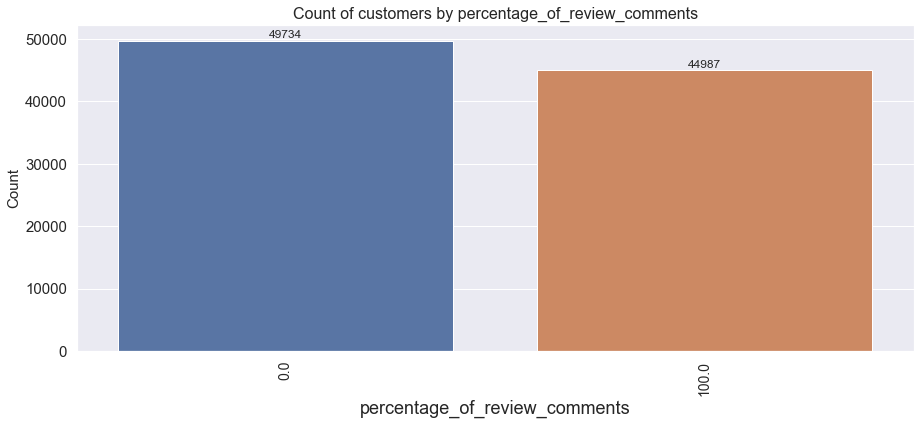

In [164]:
# Count percentage_of_review_comments

plt.figure(figsize = (15,6))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "percentage_of_review_comments", 
                  data = data)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation = 90)

plt.xlabel("percentage_of_review_comments", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of customers by percentage_of_review_comments", size = 16)

show_values(g);

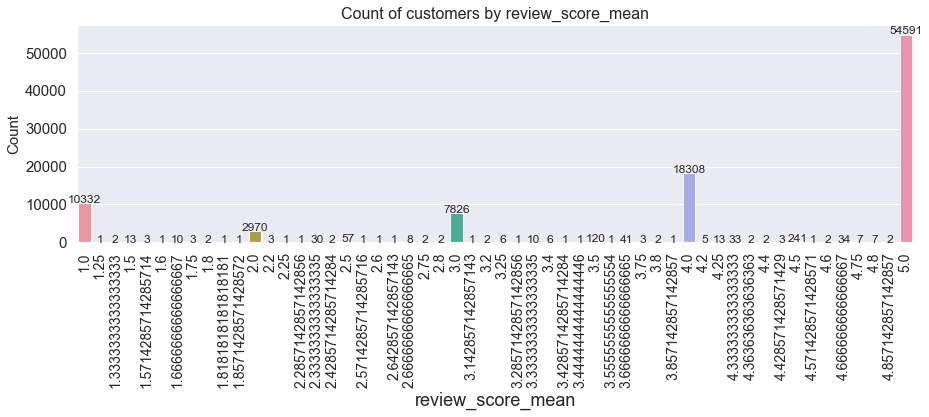

In [165]:
# Count review_score_mean

plt.figure(figsize = (15,4))

sns.set_theme(style = "darkgrid")

g = sns.countplot(x = "review_score_mean", 
                  data = data)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("review_score_mean", size = 18)
plt.ylabel("Count", size = 15)

plt.title("Count of customers by review_score_mean", size = 16)

show_values(g);

### Corrélations entre les différentes variables numériques

In [166]:
data.columns

Index(['Customer', 'deliveries', 'order_purchase_timestamp', 'last_order_days',
       'payments_total', 'review_score_mean', 'number_of_review_comments',
       'number_of_purchases', 'Number_of_products', 'percentage_deliveries',
       'percentage_of_review_comments', 'mean_payment_by_purchase'],
      dtype='object')

In [167]:
# Create the list of quantitative features
quant_feat = ['deliveries',
              'percentage_deliveries',
              'last_order_days', 
              'payments_total',
              'mean_payment_by_purchase',
              'review_score_mean', 
              'number_of_review_comments', 
              'percentage_of_review_comments', 
              'number_of_purchases',
              'Number_of_products']

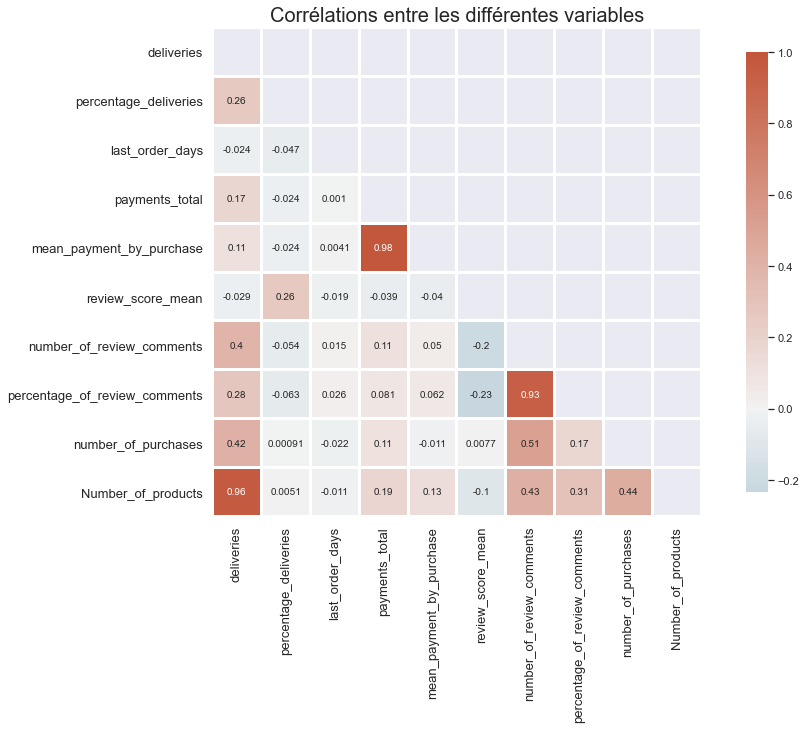

In [168]:
# compute the correlation matrix
corr = data[quant_feat].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':10}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(quant_feat)

plt.gca().set_xticklabels(quant_feat)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 13, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 13)

plt.title('Corrélations entre les différentes variables', size = 20);

-> Relevant features for the survey :  
- last_order_days : not correlated with other features  
- payments_total : lowly correlated with a few features   
- review_score_mean : lowly correlated with a few features   
- percentage_of_review_comments : lowly correlated with a few features
- number_of_purchases : lowly correlated with previously selected features

In [169]:
# Create the list of selected features
sel_feat = ['last_order_days',
            'payments_total',
            'review_score_mean',
            'percentage_of_review_comments',
            'number_of_purchases']

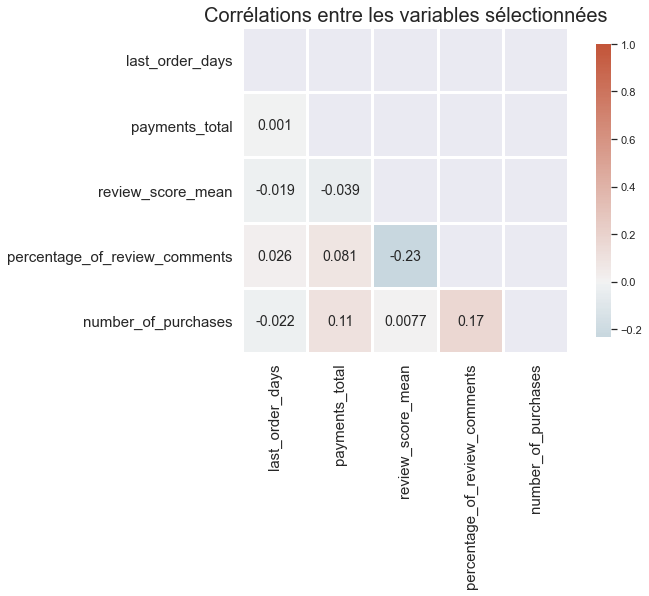

In [170]:
# compute the correlation matrix
corr = data[sel_feat].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':14}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(sel_feat)

plt.gca().set_xticklabels(sel_feat)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 15, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 15)

plt.title('Corrélations entre les variables sélectionnées', size = 20);

# 3) Réductions dimensionnelles

## 3) a) With only 3 features - orders features :
- last_order_days
- number_of_purchases
- payments_total

In [171]:
data.columns

Index(['Customer', 'deliveries', 'order_purchase_timestamp', 'last_order_days',
       'payments_total', 'review_score_mean', 'number_of_review_comments',
       'number_of_purchases', 'Number_of_products', 'percentage_deliveries',
       'percentage_of_review_comments', 'mean_payment_by_purchase'],
      dtype='object')

In [172]:
# Preparing dataset 'data_1' with index 'Customer' and the 3 orders features
data_1 = data[['Customer', 
               'number_of_purchases', 
               'payments_total', 
               'last_order_days']]

data_1 = data_1.set_index('Customer')

In [173]:
data_1

number_of_purchases  payments_total  \
Customer                                                                
b7d76e111c89f7ebf14761390f0f7d17                    1           72.89   
4854e9b3feff728c13ee5fc7d1547e92                    1           59.50   
830d5b7aaa3b6f1e9ad63703bec97d23                    1          134.97   
0eb1ee9dba87f5b36b4613a65074337c                    1          100.00   
2f64e403852e6893ae37485d5fcacdaf                    1           21.90   
...                                               ...             ...   
5c58de6fb80e93396e2f35642666b693                    1          418.00   
7febafa06d9d8f232a900a2937f04338                    1           45.90   
b701bebbdf478f5500348f03aff62121                    1           24.90   
24ac2b4327e25baf39f2119e4228976a                    1           84.99   
ff22e30958c13ffe219db7d711e8f564                    2          290.00   

                                  last_order_days  
Customer                                           
b7d76e111c89f7ebf14761390f0f7d17             1996  
4854e9b3feff728c13ee5fc7d1547e92             1996  
830d5b7aaa3b6f1e9ad63703bec97d23             1986  
0eb1ee9dba87f5b36b4613a65074337c             1968  
2f64e403852e6893ae37485d5fcacdaf             1967  
...                                           ...  
5c58de6fb80e93396e2f35642666b693             1273  
7febafa06d9d8f232a900a2937f04338             1273  
b701bebbdf478f5500348f03aff62121             1272  
24ac2b4327e25baf39f2119e4228976a             1272  
ff22e30958c13ffe219db7d711e8f564             1268  

[94721 rows x 3 columns]

In [174]:
data_1.dtypes

number_of_purchases      int64
payments_total         float64
last_order_days          int32
dtype: object

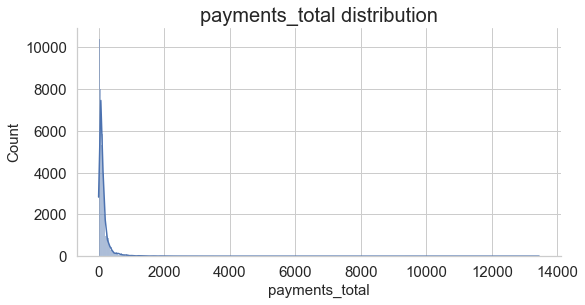

In [175]:
# Displot payments_total

sns.set_theme(style="whitegrid")

sns.displot(data_1, 
            x = "payments_total", 
            bins = 1000, 
            kde = True, 
            height = 4, 
            aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("payments_total", size = 15)
plt.ylabel("Count", size = 15)

plt.title("payments_total distribution", size = 20);

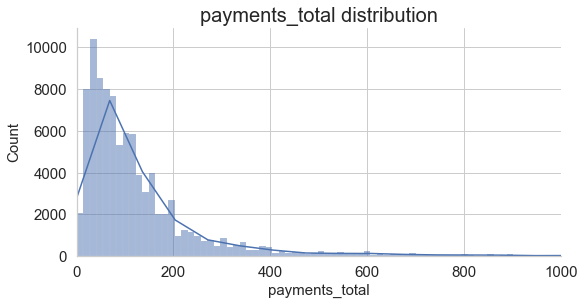

In [176]:
# Displot payments_total (zoom)

sns.set_theme(style = "whitegrid")

sns.displot(data_1, 
            x = "payments_total", 
            bins = 1000, 
            kde = True, 
            height = 4, 
            aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("payments_total", size = 15)
plt.ylabel("Count", size = 15)

plt.xlim(0,1000)

plt.title("payments_total distribution", size = 20);

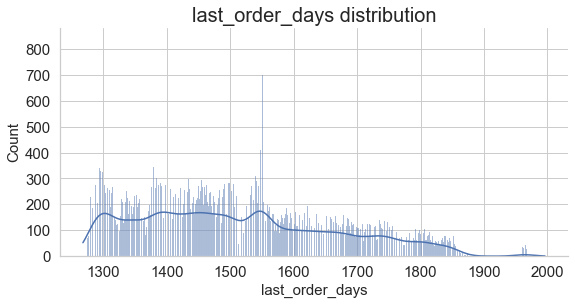

In [177]:
# Displot last_order_days

sns.set_theme(style="whitegrid")

sns.displot(data_1, 
            x = "last_order_days", 
            bins = 1000, 
            kde = True, 
            height = 4, 
            aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("last_order_days", size = 15)
plt.ylabel("Count", size = 15)

plt.title("last_order_days distribution", size = 20);

In [178]:
data_1['last_order_days'].min()

1268

In [179]:
# Change features 'last_order_days' et 'payments_total' to log10
data_1['last_order_days_log'] = np.log10(data_1['last_order_days'])

data_1['payments_total_log'] = np.log10(data_1['payments_total'])

data_1['last_order_days_min'] = data_1['last_order_days'] - data_1['last_order_days'].min() + 1
data_1['last_order_days_min_log'] = np.log10(data_1['last_order_days_min'])

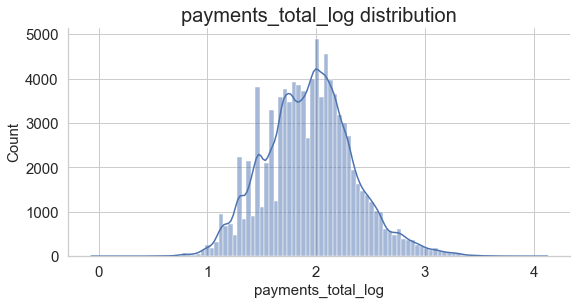

In [180]:
# Displot payments_total_log

sns.set_theme(style = "whitegrid")

sns.displot(data_1, 
            x = "payments_total_log", 
            bins = 100, 
            kde = True, 
            height = 4, 
            aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("payments_total_log", size = 15)
plt.ylabel("Count", size = 15)

plt.title("payments_total_log distribution", size = 20);

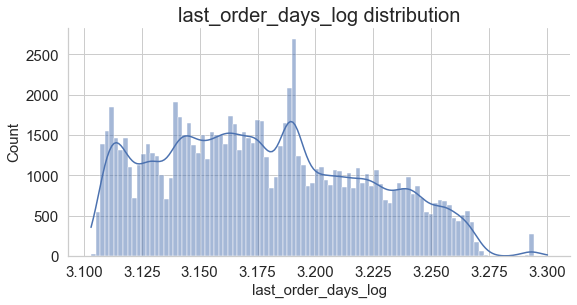

In [181]:
# Displot last_order_days_log

sns.set_theme(style="whitegrid")

sns.displot(data_1, 
            x = "last_order_days_log", 
            bins = 100, 
            kde = True, 
            height = 4, 
            aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("last_order_days_log", size = 15)
plt.ylabel("Count", size = 15)

plt.title("last_order_days_log distribution", size = 20);

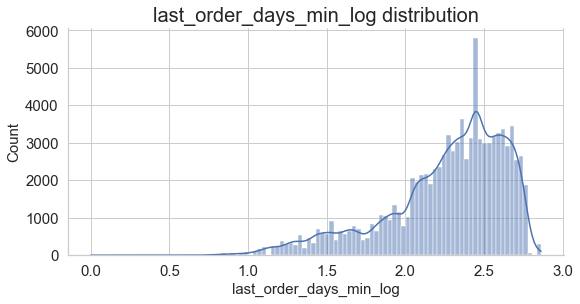

In [182]:
# Displot last_order_days_min_log

sns.set_theme(style="whitegrid")

sns.displot(data_1, 
            x = "last_order_days_min_log", 
            bins = 100, 
            kde = True, 
            height = 4, 
            aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("last_order_days_min_log", size = 15)
plt.ylabel("Count", size = 15)

plt.title("last_order_days_min_log distribution", size = 20);

In [183]:
data_1.columns

Index(['number_of_purchases', 'payments_total', 'last_order_days',
       'last_order_days_log', 'payments_total_log', 'last_order_days_min',
       'last_order_days_min_log'],
      dtype='object')

In [184]:
# Create list of features for correlation matrix
sel_feat_log = ['number_of_purchases', 'payments_total', 'last_order_days',
                'last_order_days_log', 'payments_total_log', 'last_order_days_min',
                'last_order_days_min_log']

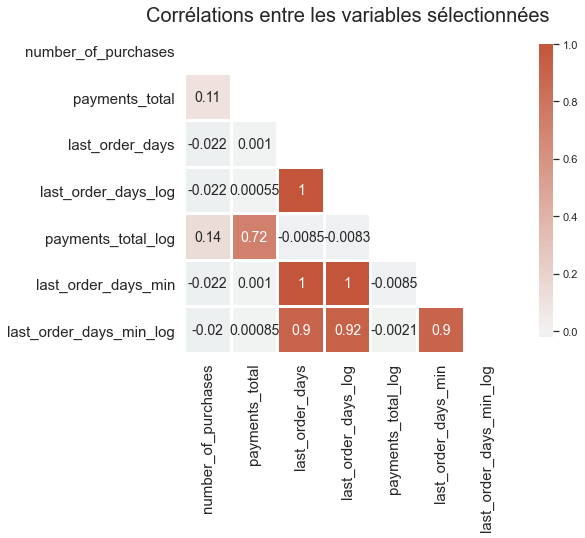

In [185]:
# compute the correlation matrix
corr = data_1[sel_feat_log].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':14}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(sel_feat_log)

plt.gca().set_xticklabels(sel_feat_log)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 15, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 15)

plt.title('Corrélations entre les variables sélectionnées', size = 20);

### PCA on entire dataset

In [186]:
X = data_1[['number_of_purchases', 'payments_total', 'last_order_days']].values

In [187]:
X.shape

(94721, 3)

In [188]:
# Standardize data
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calculate principal components
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)

# Fit on standardized data
pca.fit(X_scaled)

PCA(n_components=3)

In [189]:
# Print explained variance ratio
print(pca.explained_variance_ratio_)

# Print cumulated explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.36937029 0.33347047 0.29715924]
[0.36937029 0.70284076 1.        ]


In [190]:
# Project X on principal components
X_projected = pca.transform(X_scaled)

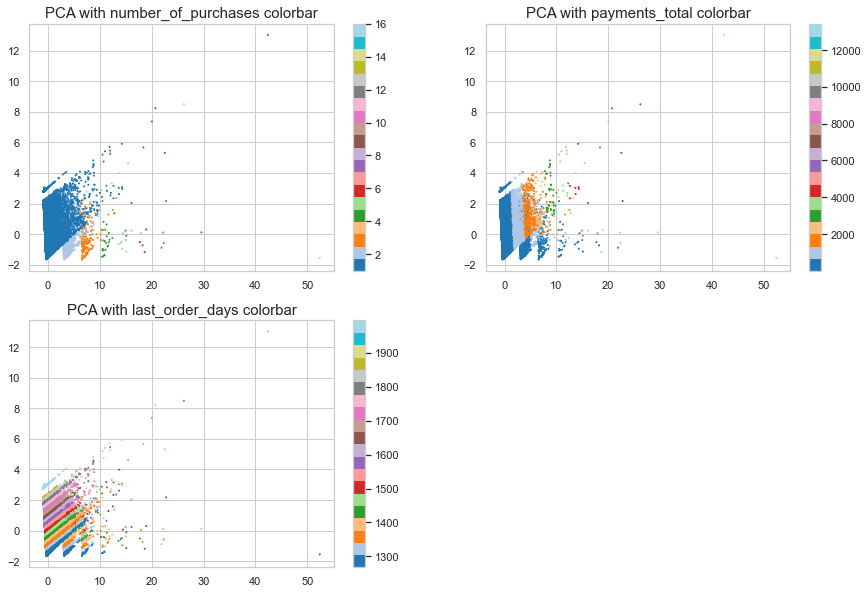

In [191]:
plt.figure(figsize = (15,10))

list_feat_3 = ['number_of_purchases', 'payments_total', 'last_order_days']

for index, feat in enumerate(list_feat_3):
    plt.subplot(2,2,index + 1)
    plt.scatter(X_projected[:, 0],
                X_projected[:, 1],
                s = 1,
                # Color with feature 'feat'
                c = data_1.get(feat),
                cmap = "tab20")
    plt.title('PCA with '+ feat + ' colorbar', size = 15)
    plt.colorbar()

plt.show()

In [192]:
# Contribution of each feature for principal components
pcs = pca.components_

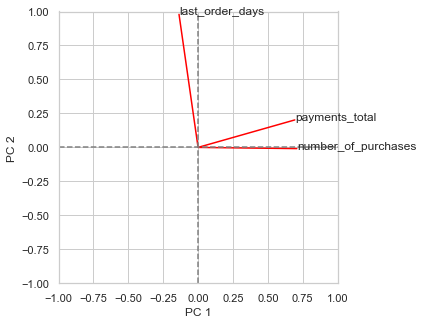

In [193]:
fig = plt.figure(figsize=(5, 5))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='red')
    # Afficher le nom(data_1.columns[i]) de la performance
    plt.text(x, y, data_1.columns[i])

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

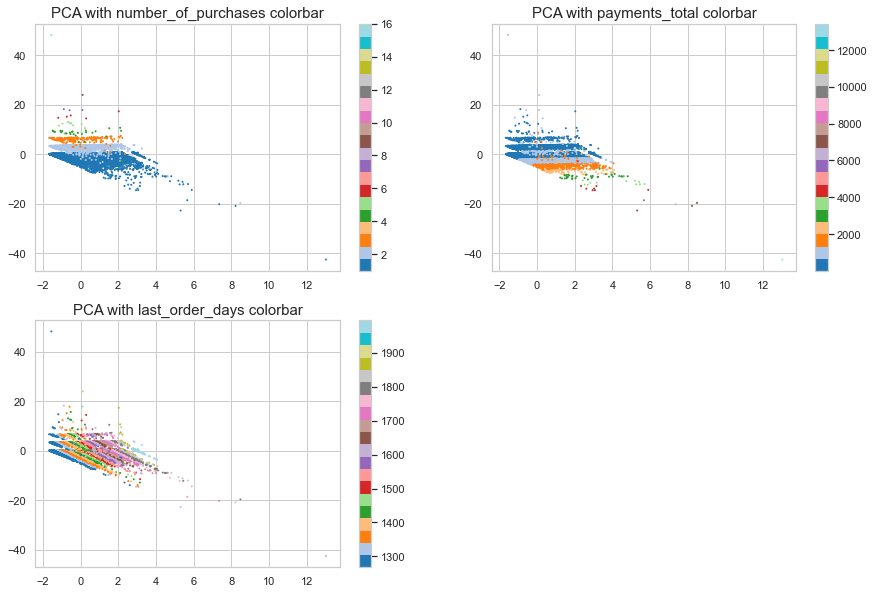

In [194]:
plt.figure(figsize = (15,10))

list_feat_3 = ['number_of_purchases', 'payments_total', 'last_order_days']

for index, feat in enumerate(list_feat_3):
    # Afficher chaque observation
    plt.subplot(2,2,index + 1)
    plt.scatter(X_projected[:, 1],
                X_projected[:, 2],
                s = 1,
                # Color with feature 'feat'
                c = data_1.get(feat),
                cmap = "tab20")
    plt.title('PCA with '+ feat + ' colorbar', size = 15)
    plt.colorbar()

plt.show()

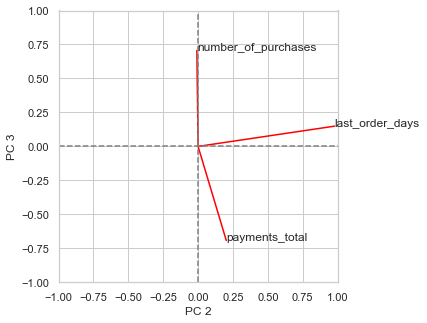

In [195]:
fig = plt.figure(figsize=(5, 5))

for i, (x, y) in enumerate(zip(pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='red')
    # Afficher le nom(data_1.columns[i]) de la performance
    plt.text(x, y, data_1.columns[i])

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 2')
plt.ylabel('PC 3')

plt.show()

### t-SNE (t-Stochastic Neighbour Embedding) on entire dataset

In [196]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X_scaled)
tsne_result.shape

(94721, 2)

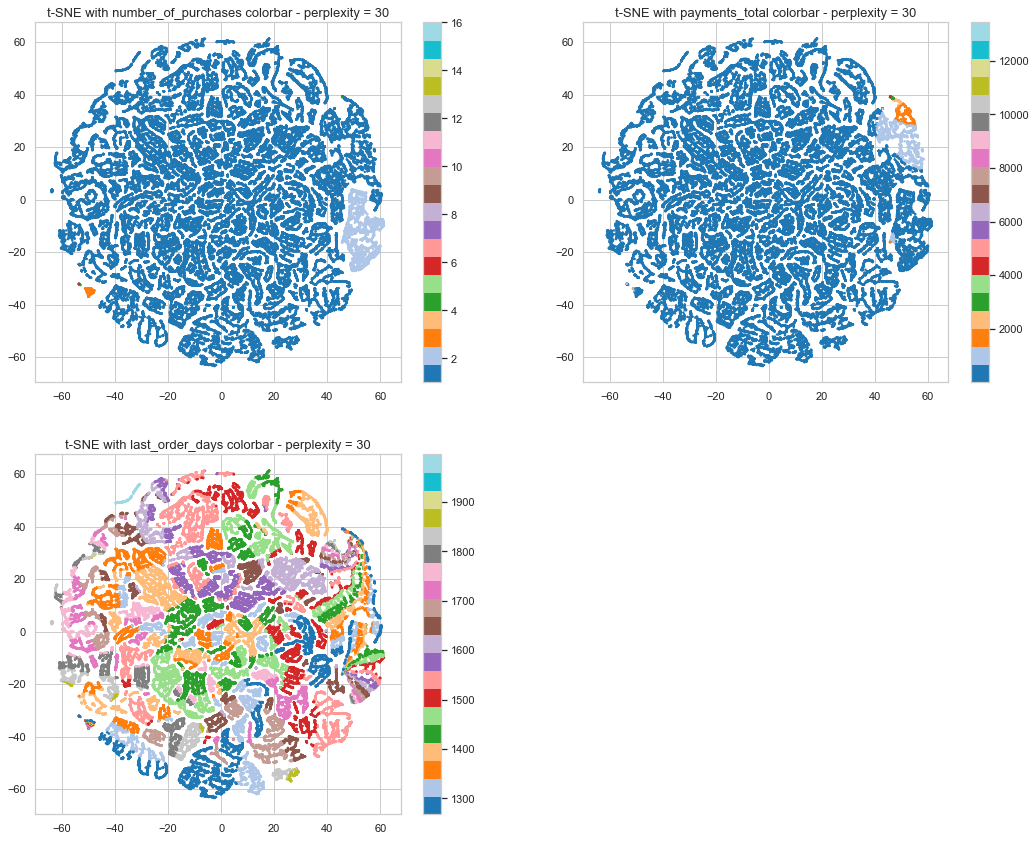

In [197]:
plt.figure(figsize = (18,8))
plt.subplots_adjust(top = 1.5)

tsne_results = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_3):    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results['tsne1'], 
                tsne_results['tsne2'],
                # Color with feature 'feat'
                c = data_1.get(feat),
                s = 2, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 30', size = 13)
    plt.colorbar()

plt.show()

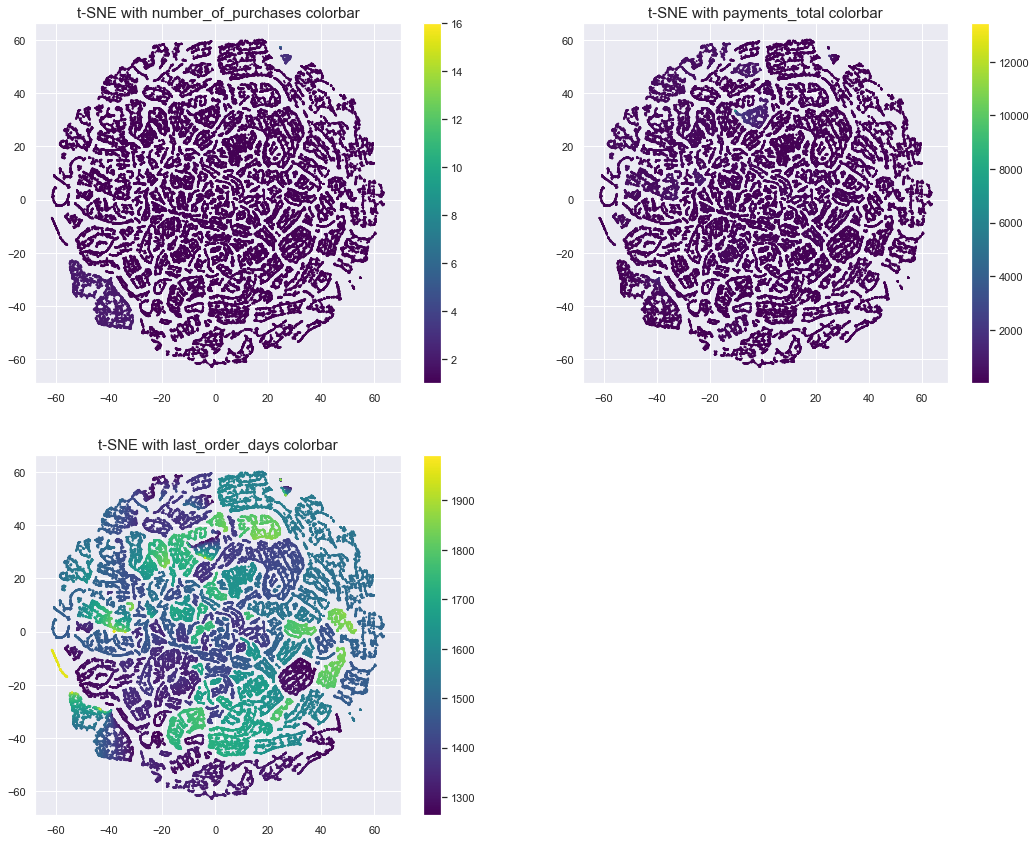

In [387]:
# Changing cmap 'tab20' to 'viridis'
plt.figure(figsize = (18,8))
plt.subplots_adjust(top = 1.5)

tsne_results = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_3):    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results['tsne1'], 
                tsne_results['tsne2'],
                # Color with feature 'feat'
                c = data_1.get(feat), 
                s = 1, 
                cmap = 'viridis')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 30', size = 13)
    plt.colorbar()

plt.show()

In [198]:
# Other test : perplexity = 75 (default perplexity = 30)
n_components = 2
tsne = TSNE(n_components,
            init = 'random',
            perplexity = 75,
            n_iter = 1000,
            random_state = 0)
tsne_result_p75 = tsne.fit_transform(X_scaled)
tsne_result_p75.shape

(94721, 2)

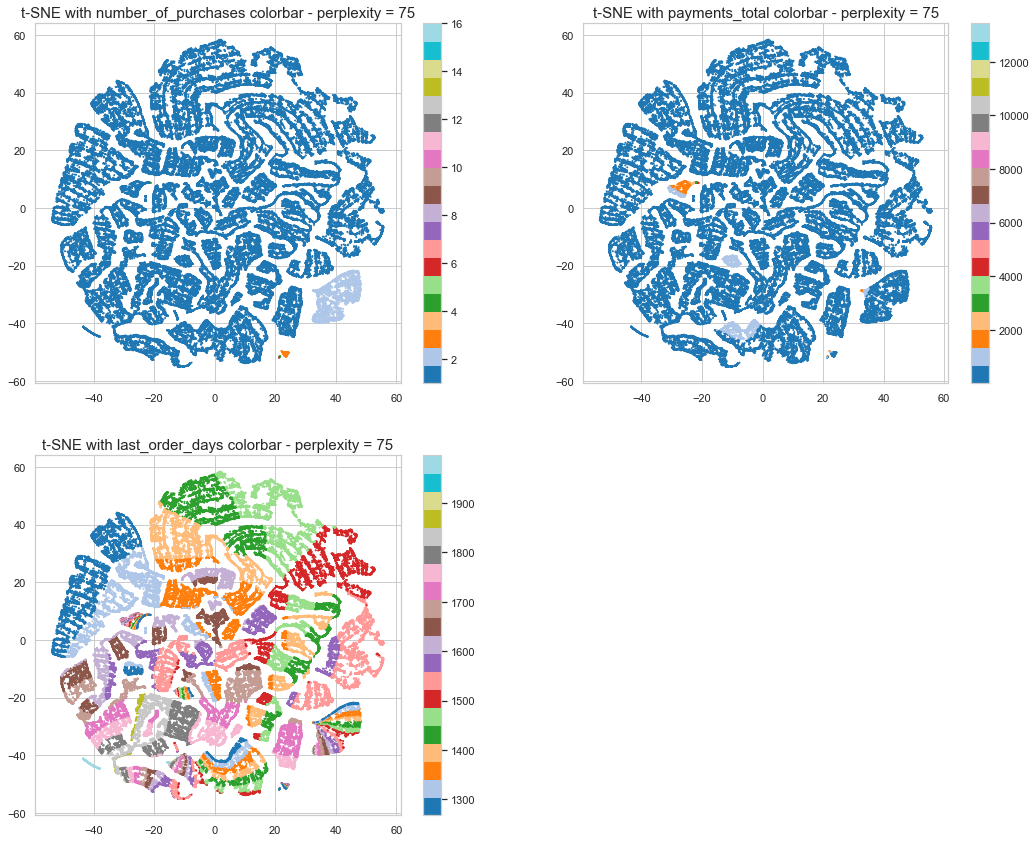

In [199]:
plt.figure(figsize = (18,8))
plt.subplots_adjust(top = 1.5)

tsne_results_p75 = pd.DataFrame(tsne_result_p75, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_3):    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results_p75['tsne1'], 
                tsne_results_p75['tsne2'], 
                c = data_1.get(feat), 
                s = 1, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 75', size = 15)
    plt.colorbar()

plt.show()

In [200]:
# Other test : perplexity = 100 (default perplexity = 30)
n_components = 2
tsne = TSNE(n_components,
            init = 'random',
            perplexity = 100,
            n_iter = 1000,
            random_state = 0)
tsne_result_p100 = tsne.fit_transform(X_scaled)
tsne_result_p100.shape

(94721, 2)

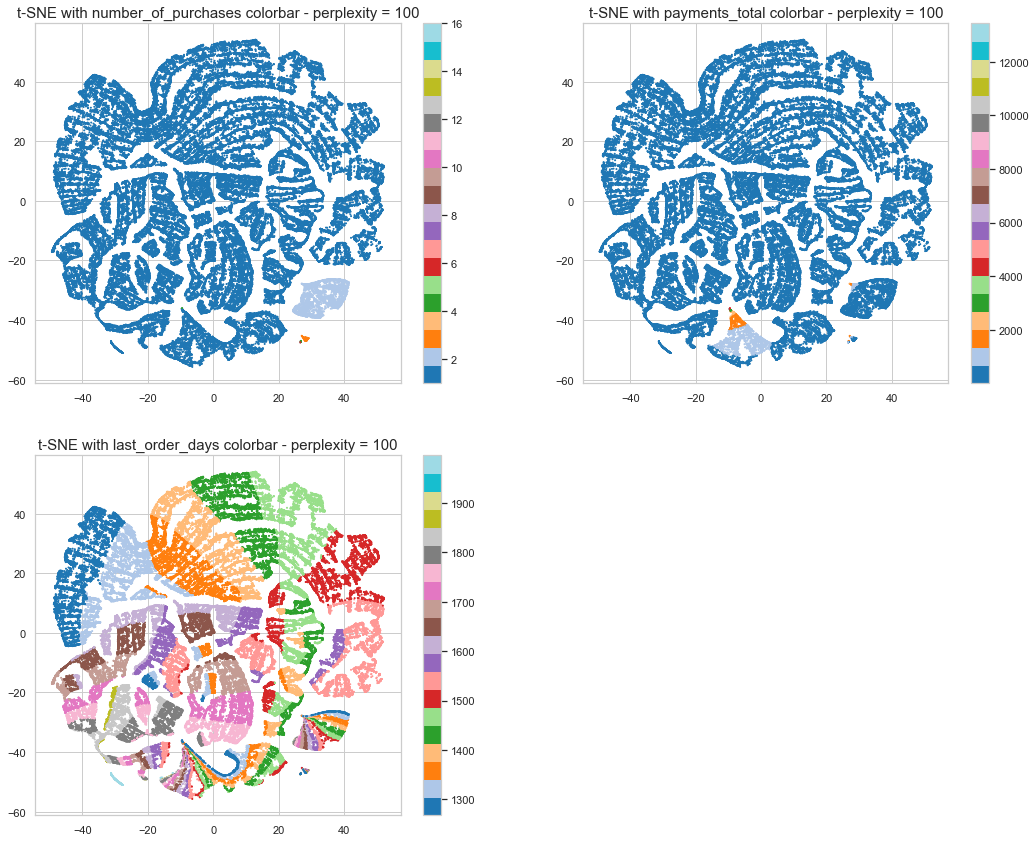

In [201]:
plt.figure(figsize = (18,8))
plt.subplots_adjust(top = 1.5)

tsne_results_p100 = pd.DataFrame(tsne_result_p100, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_3):    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results_p100['tsne1'], 
                tsne_results_p100['tsne2'], 
                c = data_1.get(feat), 
                s = 1, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 100', size = 15)
    plt.colorbar()

plt.show()

In [202]:
# Other test : perplexity = 100, init = 'pca' (default perplexity = 30)
n_components = 2
tsne = TSNE(n_components,
            init = 'pca',
            perplexity = 100,
            n_iter = 1000,
            random_state = 0)
tsne_result_p100_pca = tsne.fit_transform(X_scaled)
tsne_result_p100_pca.shape

(94721, 2)

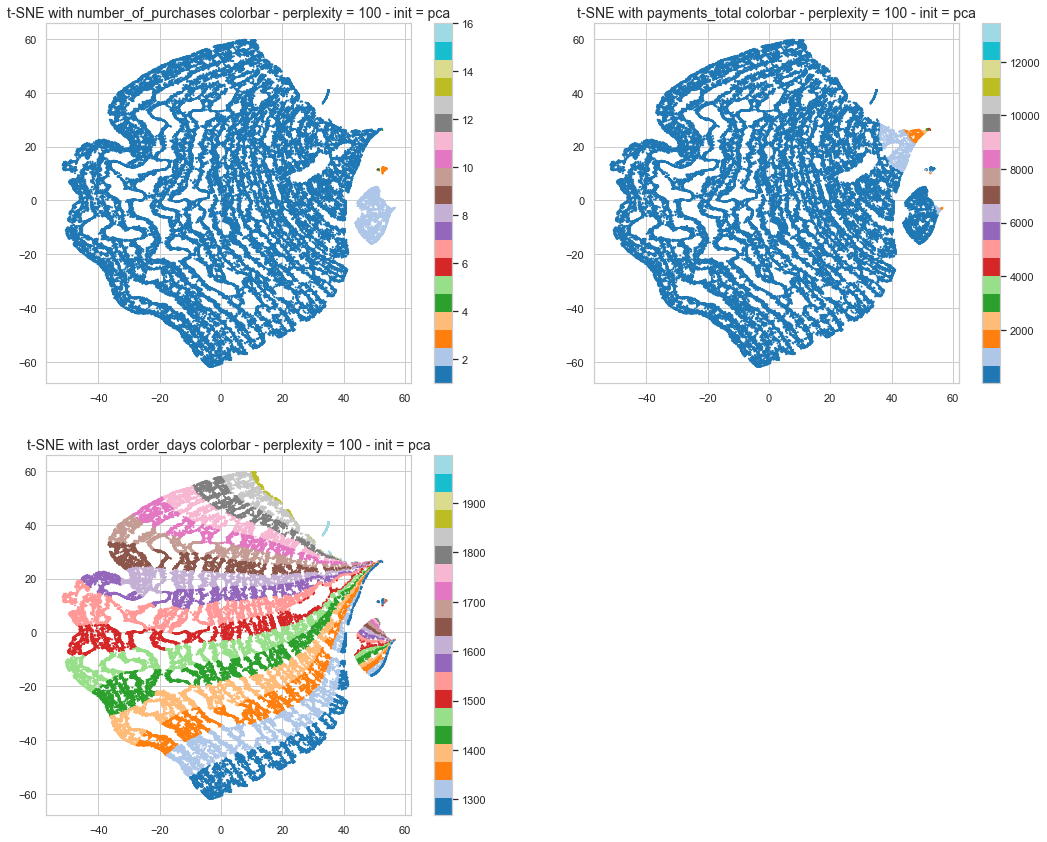

In [203]:
plt.figure(figsize = (18,8))
plt.subplots_adjust(top = 1.5)

tsne_results_p100_pca = pd.DataFrame(tsne_result_p100_pca, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_3):    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results_p100_pca['tsne1'], 
                tsne_results_p100_pca['tsne2'], 
                c = data_1.get(feat), 
                s = 1, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 100 - init = pca', size = 14)
    plt.colorbar()

plt.show()

### PCA on reduced dataset (several purchases)

In [204]:
data_2 = data_1.loc[data_1['number_of_purchases'] > 1]

In [205]:
data_2

number_of_purchases  payments_total  \
Customer                                                                
f7b62c75467e8ce080b201667cbbc274                    2          150.77   
7a176e5d88c7acb6000a055e008c055d                    2          579.79   
0ecf7f65b5ff3b9e61b637e59f495e0a                    2          126.69   
f7b981e8a280e455ac3cbe0d5d171bd1                    2           21.80   
728e4a7d0db4845270091ded0923c71f                    3           20.70   
...                                               ...             ...   
41d57ab847e5ccbe403f46b07ee577d6                    2          131.90   
34b0cd95480e55c2a701293a2b9671b3                    3          263.63   
fb7e29c65321441231990afc201c1b14                    2          268.69   
1041688b50cfd8ef6df6086a1746a30c                    2           41.80   
ff22e30958c13ffe219db7d711e8f564                    2          290.00   

                                  last_order_days  last_order_days_log  \
Customer                                                                 
f7b62c75467e8ce080b201667cbbc274             1964             3.293141   
7a176e5d88c7acb6000a055e008c055d             1962             3.292699   
0ecf7f65b5ff3b9e61b637e59f495e0a             1960             3.292256   
f7b981e8a280e455ac3cbe0d5d171bd1             1874             3.272770   
728e4a7d0db4845270091ded0923c71f             1874             3.272770   
...                                           ...                  ...   
41d57ab847e5ccbe403f46b07ee577d6             1274             3.105169   
34b0cd95480e55c2a701293a2b9671b3             1274             3.105169   
fb7e29c65321441231990afc201c1b14             1273             3.104828   
1041688b50cfd8ef6df6086a1746a30c             1273             3.104828   
ff22e30958c13ffe219db7d711e8f564             1268             3.103119   

                                  payments_total_log  last_order_days_min  \
Customer                                                                    
f7b62c75467e8ce080b201667cbbc274            2.178315                  697   
7a176e5d88c7acb6000a055e008c055d            2.763271                  695   
0ecf7f65b5ff3b9e61b637e59f495e0a            2.102742                  693   
f7b981e8a280e455ac3cbe0d5d171bd1            1.338456                  607   
728e4a7d0db4845270091ded0923c71f            1.315970                  607   
...                                              ...                  ...   
41d57ab847e5ccbe403f46b07ee577d6            2.120245                    7   
34b0cd95480e55c2a701293a2b9671b3            2.420995                    7   
fb7e29c65321441231990afc201c1b14            2.429252                    6   
1041688b50cfd8ef6df6086a1746a30c            1.621176                    6   
ff22e30958c13ffe219db7d711e8f564            2.462398                    1   

                                  last_order_days_min_log  
Customer                                                   
f7b62c75467e8ce080b201667cbbc274                 2.843233  
7a176e5d88c7acb6000a055e008c055d                 2.841985  
0ecf7f65b5ff3b9e61b637e59f495e0a                 2.840733  
f7b981e8a280e455ac3cbe0d5d171bd1                 2.783189  
728e4a7d0db4845270091ded0923c71f                 2.783189  
...                                                   ...  
41d57ab847e5ccbe403f46b07ee577d6                 0.845098  
34b0cd95480e55c2a701293a2b9671b3                 0.845098  
fb7e29c65321441231990afc201c1b14                 0.778151  
1041688b50cfd8ef6df6086a1746a30c                 0.778151  
ff22e30958c13ffe219db7d711e8f564                 0.000000  

[2869 rows x 7 columns]

In [207]:
X2 = data_2[['number_of_purchases', 'payments_total', 'last_order_days']].values
X2.shape

(2869, 3)

In [208]:
# Standardize data
std_scale = preprocessing.StandardScaler().fit(X2)
X2_scaled = std_scale.transform(X2)

# Calculate principal components
pca = decomposition.PCA(n_components=3)

# Fit on standardized data
pca.fit(X2_scaled)

PCA(n_components=3)

In [209]:
# Explained variance ratio
print(pca.explained_variance_ratio_)

# Cumulated explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.39637797 0.32834234 0.27527969]
[0.39637797 0.72472031 1.        ]


In [210]:
# Projection de X2 sur les composantes principales
X2_projected = pca.transform(X2_scaled)

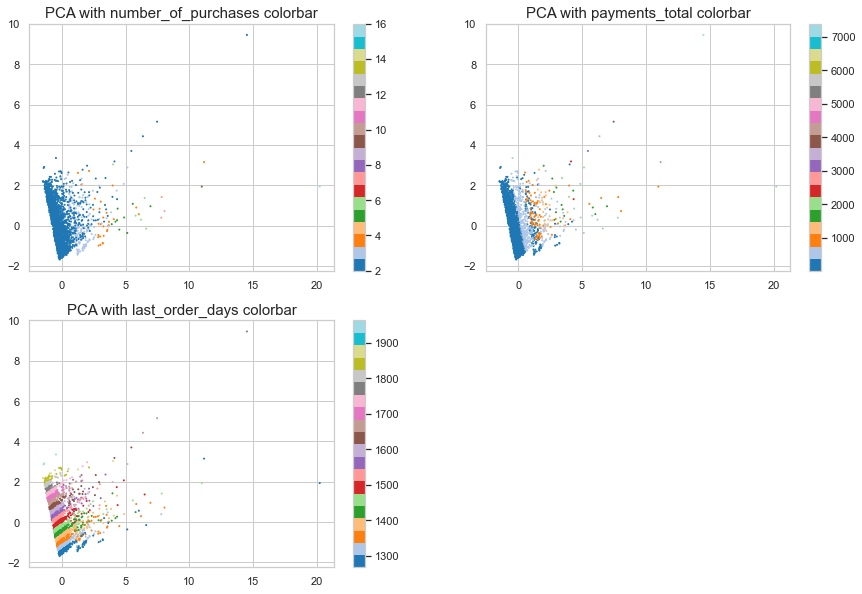

In [211]:
plt.figure(figsize = (15,10))

list_feat_3 = ['number_of_purchases', 'payments_total', 'last_order_days']

for index, feat in enumerate(list_feat_3):
    # Afficher chaque observation
    plt.subplot(2,2,index + 1)
    plt.scatter(X2_projected[:, 0],
                X2_projected[:, 1],
                s = 1,
                # Colorer en utilisant la variable 'feat'
                c = data_2.get(feat),
                cmap = "tab20")
    plt.title('PCA with '+ feat + ' colorbar', size = 15)
    plt.colorbar()

plt.show()

In [212]:
# Contribution de chaque variable aux composantes principales
pcs = pca.components_

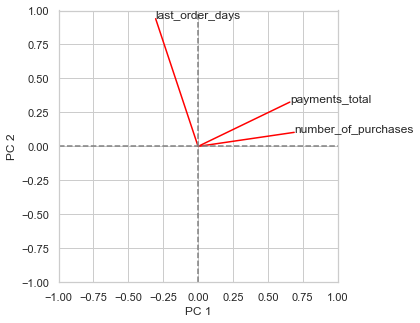

In [213]:
fig = plt.figure(figsize=(5, 5))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='red')
    # Afficher le nom(data_1.columns[i]) de la performance
    plt.text(x, y, data_2.columns[i])

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

### t-SNE (t-Stochastic Neighbour Embedding) on reduced dataset (number of purchases > 1)

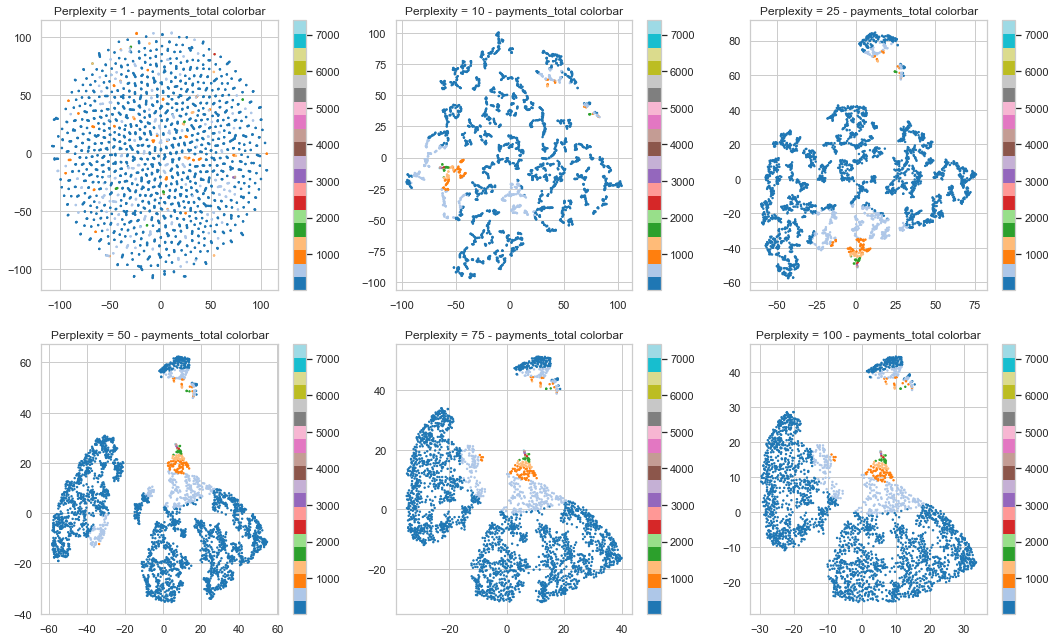

In [214]:
plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

for index, p in enumerate([1, 10, 25, 50, 75, 100]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(X2_scaled)
    
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    
    plt.subplot(2,3,index+1)
    plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], 
                c=data_2.get('payments_total'), s=2, cmap = 'tab20')
    plt.title('Perplexity = '+ str(p) + ' - ' + 'payments_total colorbar', size = 12)
    plt.colorbar()
    
plt.show()

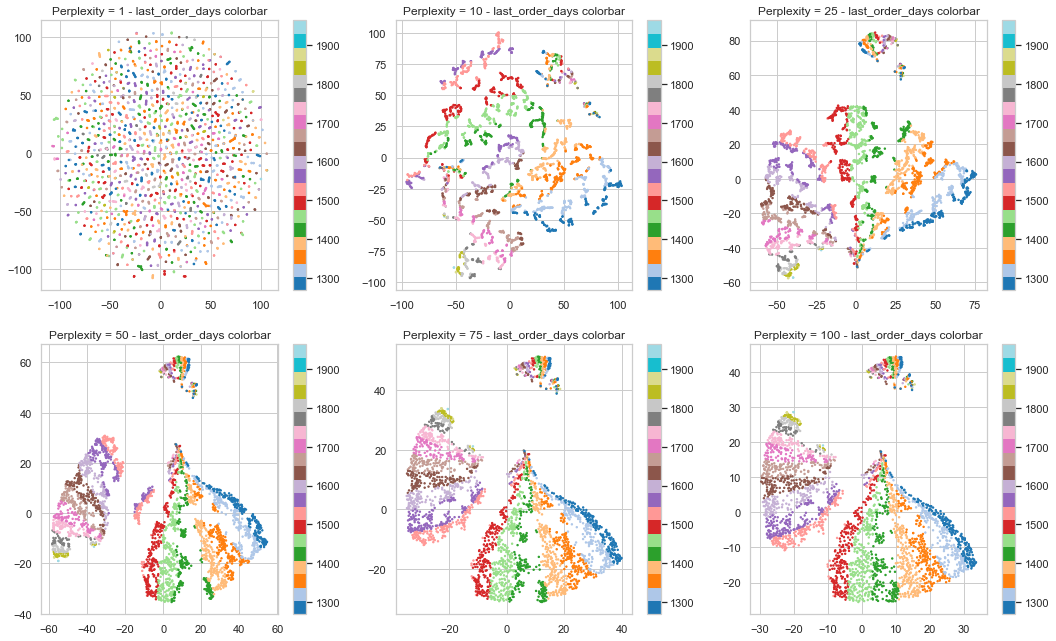

In [215]:
plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

for index, p in enumerate([1, 10, 25, 50, 75, 100]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(X2_scaled)
    
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    
    plt.subplot(2,3,index+1)
    plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], 
                c=data_2.get('last_order_days'), s=2, cmap = 'tab20')
    plt.title('Perplexity = '+ str(p) + ' - ' + 'last_order_days colorbar', size = 12)
    plt.colorbar()
    
plt.show()

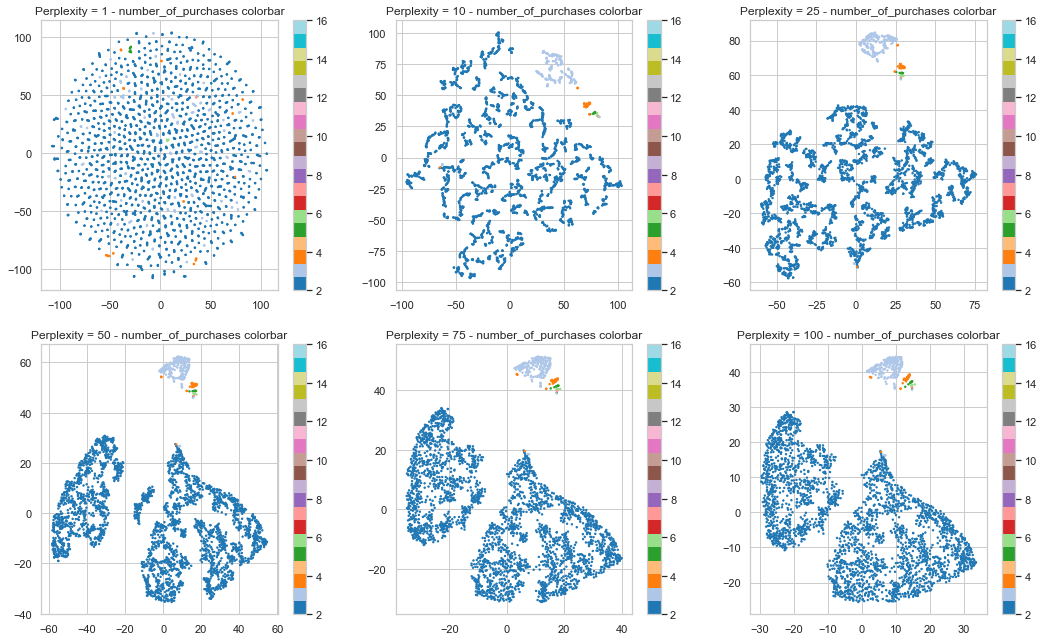

In [216]:
plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

for index, p in enumerate([1, 10, 25, 50, 75, 100]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(X2_scaled)
    
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    
    plt.subplot(2,3,index+1)
    plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], 
                c=data_2.get('number_of_purchases'), s=2, cmap = 'tab20')
    plt.title('Perplexity = '+ str(p) + ' - ' + 'number_of_purchases colorbar', size = 12)
    plt.colorbar()
    
plt.show()

In [436]:
data.columns

Index(['Customer', 'deliveries', 'last_order_days', 'payments_total',
       'review_score_mean', 'number_of_review_comments', 'number_of_purchases',
       'Number_of_products', 'percentage_deliveries',
       'percentage_of_review_comments', 'mean_payment_by_purchase'],
      dtype='object')

## 3) b) With 5 features - orders, satisfaction and comment features :
- last_order_days
- number_of_purchases
- payments_total
- review_score_mean
- percentage_of_review_comments

In [217]:
data_5 = data[['Customer', 
               'number_of_purchases', 
               'payments_total', 
               'last_order_days',
               'review_score_mean',
               'percentage_of_review_comments']]

data_5 = data_5.set_index('Customer')

In [218]:
data_5.dtypes

number_of_purchases                int64
payments_total                   float64
last_order_days                    int32
review_score_mean                float64
percentage_of_review_comments    float64
dtype: object

### PCA on entire dataset

In [219]:
X5 = data_5.values
X5.shape

(94721, 5)

In [220]:
# Standardisation des données
std_scale = preprocessing.StandardScaler().fit(X5)
X5_scaled = std_scale.transform(X5)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=5)

# Fit sur le jeu de données standardisées
pca.fit(X5_scaled)

PCA(n_components=5)

In [221]:
# Pourcentage de variance expliquée
print(pca.explained_variance_ratio_)

# Pourcentage de variance expliquée cumulées
print(pca.explained_variance_ratio_.cumsum())

[0.26656693 0.21190624 0.19749692 0.1827478  0.14128211]
[0.26656693 0.47847318 0.6759701  0.85871789 1.        ]


In [222]:
# Projection de X sur les composantes principales
X5_projected = pca.transform(X5_scaled)

In [223]:
# Contribution de chaque variable aux composantes principales
pcs = pca.components_

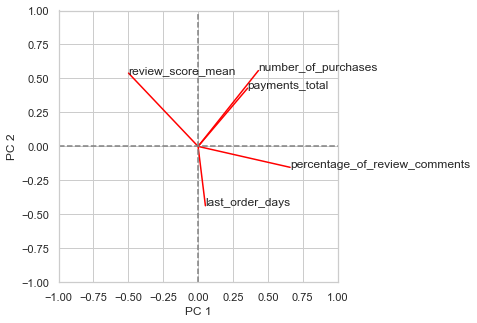

In [224]:
fig = plt.figure(figsize=(5, 5))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='red')
    # Afficher le nom(data_5.columns[i]) de la performance
    plt.text(x, y, data_5.columns[i])

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

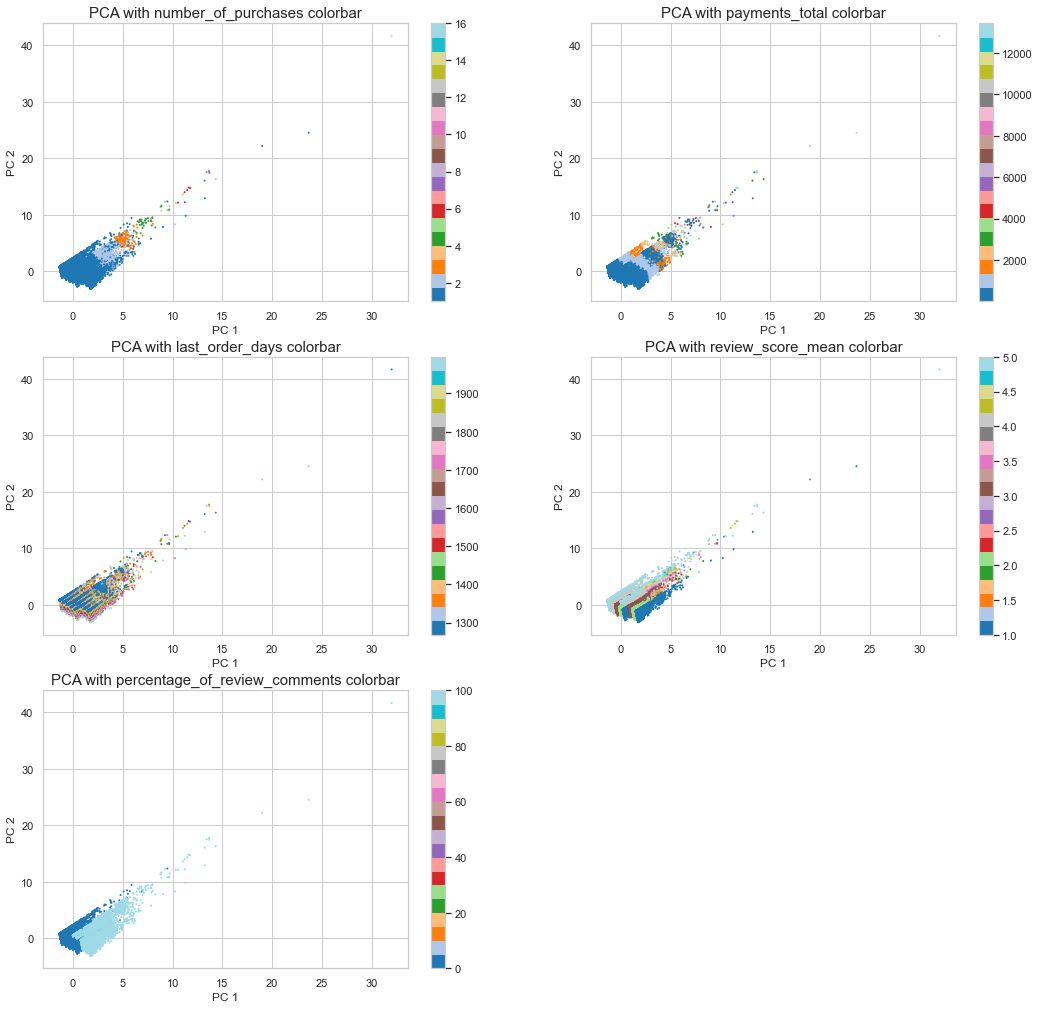

In [225]:
plt.figure(figsize = (18,15))
plt.subplots_adjust(top = 1)

list_feat_5 = ['number_of_purchases', 'payments_total', 'last_order_days',
               'review_score_mean', 'percentage_of_review_comments']

for index, feat in enumerate(list_feat_5):
    # Afficher chaque observation
    plt.subplot(3,2,index + 1)
    plt.scatter(X5_projected[:, 0],
                X5_projected[:, 1],
                s = 1,
                # Colorer en utilisant la variable 'feat'
                c = data_5.get(feat),
                cmap = "tab20")
    plt.title('PCA with '+ feat + ' colorbar', size = 15)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.colorbar()

plt.show()

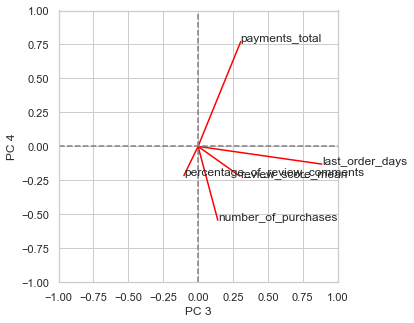

In [226]:
fig = plt.figure(figsize=(5, 5))

for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='red')
    # Afficher le nom(data_5.columns[i]) de la performance
    plt.text(x, y, data_5.columns[i])

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 3')
plt.ylabel('PC 4')

plt.show()

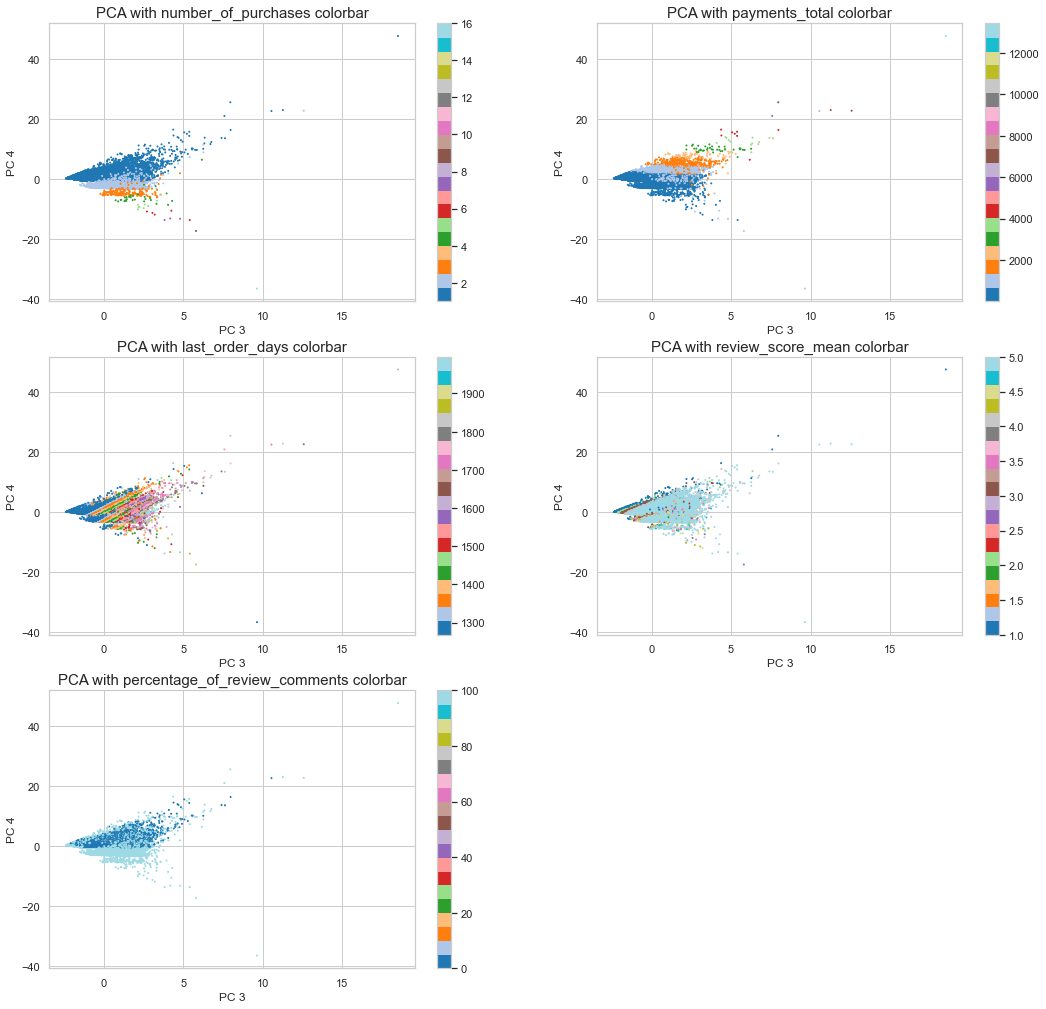

In [227]:
plt.figure(figsize = (18,15))
plt.subplots_adjust(top = 1)

list_feat_5 = ['number_of_purchases', 'payments_total', 'last_order_days',
               'review_score_mean', 'percentage_of_review_comments']

for index, feat in enumerate(list_feat_5):
    # Afficher chaque observation
    plt.subplot(3,2,index + 1)
    plt.scatter(X5_projected[:, 2],
                X5_projected[:, 3],
                s = 1,
                # Colorer en utilisant la variable 'feat'
                c = data_5.get(feat),
                cmap = "tab20")
    plt.title('PCA with '+ feat + ' colorbar', size = 15)
    plt.xlabel('PC 3')
    plt.ylabel('PC 4')
    plt.colorbar()

plt.show()

### t-SNE (t-Stochastic Neighbour Embedding) on entire dataset

In [228]:
# Perplexity = 75 (default perplexity = 30)
n_components = 2
tsne = TSNE(n_components,
            init = 'random',
            perplexity = 75,
            n_iter = 1000,
            random_state = 0)
tsne_result_p75 = tsne.fit_transform(X5_scaled)
tsne_result_p75.shape

(94721, 2)

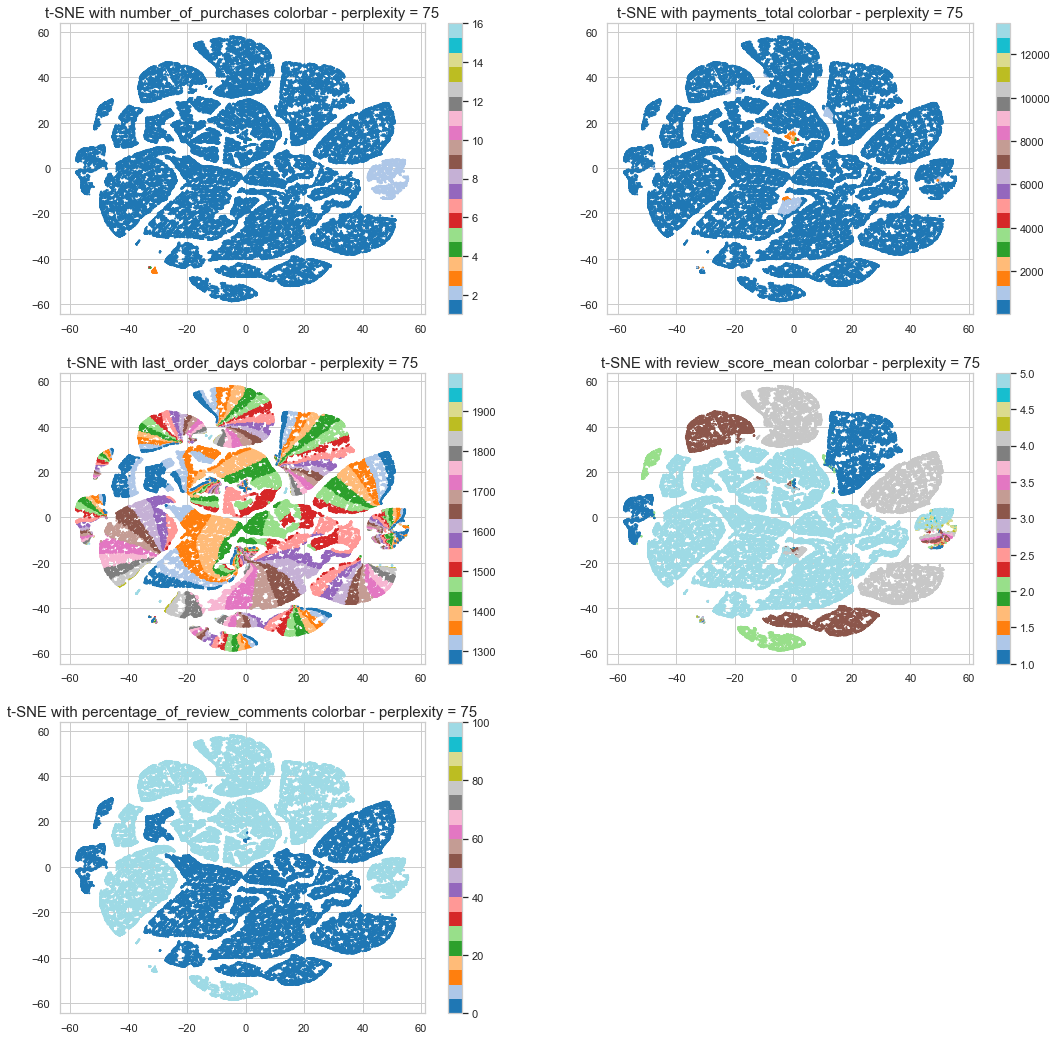

In [230]:
plt.figure(figsize = (18,10))
plt.subplots_adjust(top = 1.5)

tsne_results_p75 = pd.DataFrame(tsne_result_p75, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_5):    
    plt.subplot(3,2,index+1)
    plt.scatter(tsne_results_p75['tsne1'], 
                tsne_results_p75['tsne2'], 
                c = data_5.get(feat), 
                s = 1, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 75', size = 15)
    plt.colorbar()

plt.show()

In [231]:
# Perplexity = 100 (default perplexity = 30)
n_components = 2
tsne = TSNE(n_components,
            init = 'random',
            perplexity = 100,
            n_iter = 1000,
            random_state = 0)
tsne_result_p100 = tsne.fit_transform(X5_scaled)
tsne_result_p100.shape

(94721, 2)

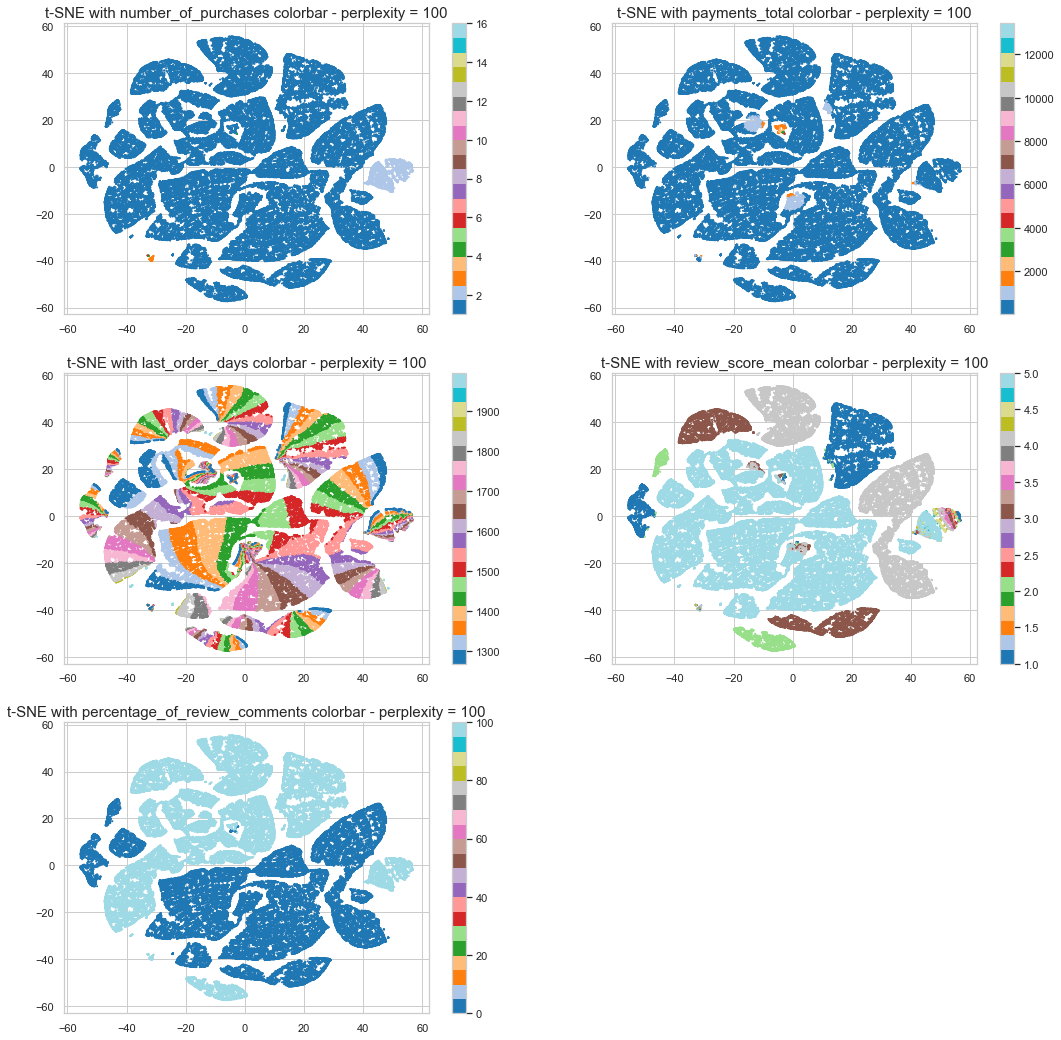

In [233]:
plt.figure(figsize = (18,10))
plt.subplots_adjust(top = 1.5)

tsne_results_p100 = pd.DataFrame(tsne_result_p100, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_5):    
    plt.subplot(3,2,index+1)
    plt.scatter(tsne_results_p100['tsne1'], 
                tsne_results_p100['tsne2'], 
                c = data_5.get(feat), 
                s = 1, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 100', size = 15)
    plt.colorbar()

plt.show()

## 3) c) With 4 features - orders and satisfaction features :
- last_order_days
- number_of_purchases
- payments_total
- review_score_mean

In [234]:
data_4 = data[['Customer', 
               'number_of_purchases', 
               'payments_total', 
               'last_order_days',
               'review_score_mean']]

data_4 = data_4.set_index('Customer')

In [235]:
X4 = data_4.values
X4.shape

(94721, 4)

### PCA on entire dataset

In [236]:
# Standardisation des données
std_scale = preprocessing.StandardScaler().fit(X4)
X4_scaled = std_scale.transform(X4)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=4)

# Fit sur le jeu de données standardisées
pca.fit(X4_scaled)

PCA(n_components=4)

In [237]:
# Pourcentage de variance expliquée
print(pca.explained_variance_ratio_)

# Pourcentage de variance expliquée cumulées
print(pca.explained_variance_ratio_.cumsum())

[0.27789103 0.25690582 0.24430431 0.22089884]
[0.27789103 0.53479684 0.77910116 1.        ]


In [238]:
# Projection de X sur les composantes principales
X4_projected = pca.transform(X4_scaled)

In [239]:
# Contribution de chaque variable aux composantes principales
pcs = pca.components_

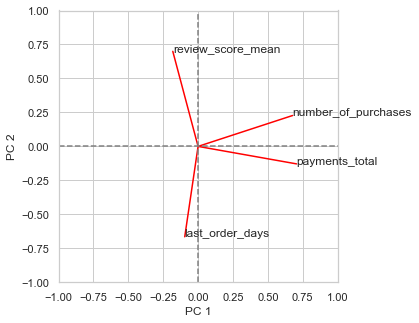

In [240]:
fig = plt.figure(figsize=(5, 5))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='red')
    # Afficher le nom(data_5.columns[i]) de la performance
    plt.text(x, y, data_4.columns[i])

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

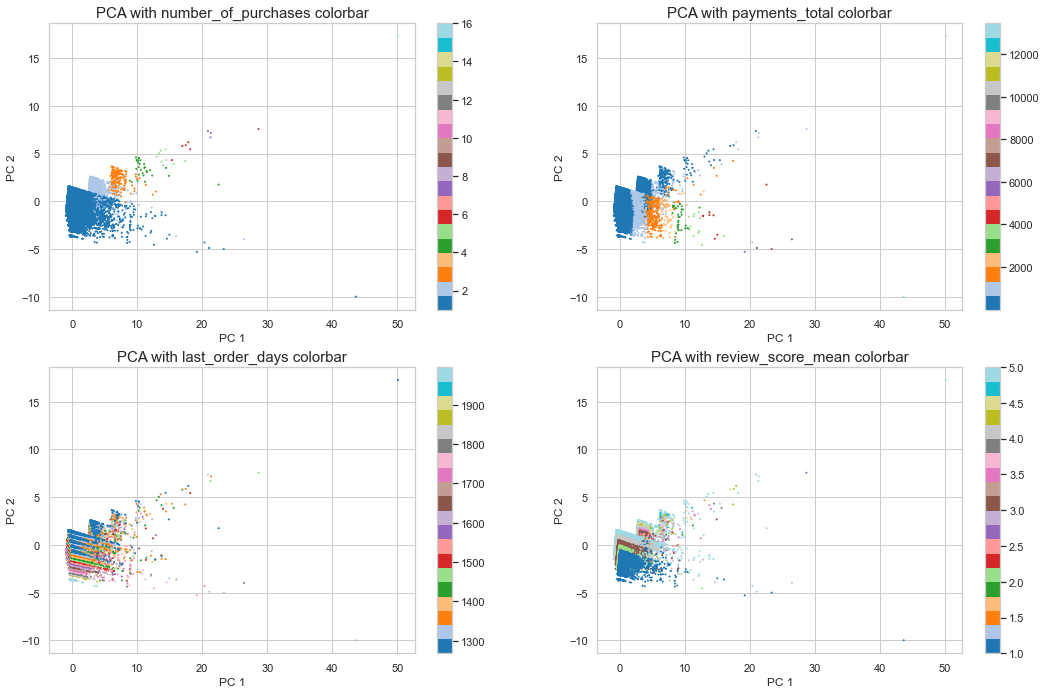

In [243]:
plt.figure(figsize = (18,10))
plt.subplots_adjust(top = 1)

list_feat_4 = ['number_of_purchases', 'payments_total', 
               'last_order_days', 'review_score_mean']

for index, feat in enumerate(list_feat_4):
    # Afficher chaque observation
    plt.subplot(2,2,index + 1)
    plt.scatter(X4_projected[:, 0],
                X4_projected[:, 1],
                s = 1,
                # Colorer en utilisant la variable 'feat'
                c = data_4.get(feat),
                cmap = "tab20")
    plt.title('PCA with '+ feat + ' colorbar', size = 15)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.colorbar()

plt.show()

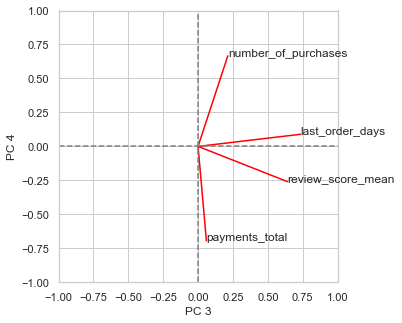

In [244]:
fig = plt.figure(figsize=(5, 5))

for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='red')
    # Afficher le nom(data_5.columns[i]) de la performance
    plt.text(x, y, data_4.columns[i])

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 3')
plt.ylabel('PC 4')

plt.show()

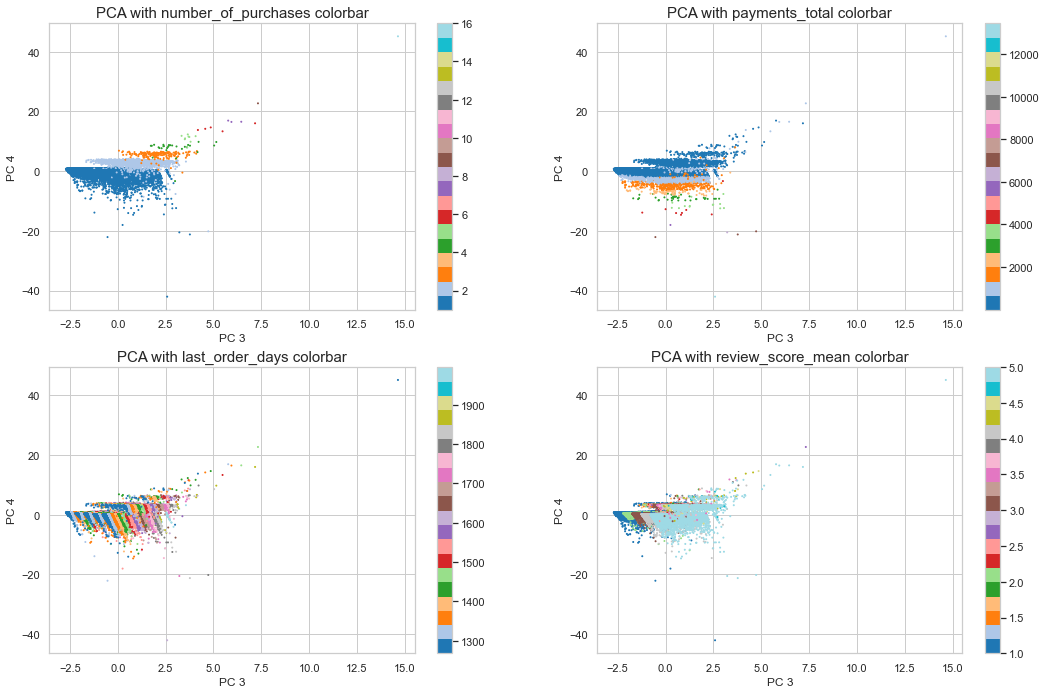

In [245]:
plt.figure(figsize = (18,10))
plt.subplots_adjust(top = 1)

list_feat_4 = ['number_of_purchases', 'payments_total', 
               'last_order_days', 'review_score_mean']

for index, feat in enumerate(list_feat_4):
    # Afficher chaque observation
    plt.subplot(2,2,index + 1)
    plt.scatter(X4_projected[:, 2],
                X4_projected[:, 3],
                s = 1,
                # Colorer en utilisant la variable 'feat'
                c = data_4.get(feat),
                cmap = "tab20")
    plt.title('PCA with '+ feat + ' colorbar', size = 15)
    plt.xlabel('PC 3')
    plt.ylabel('PC 4')
    plt.colorbar()

plt.show()

### t-SNE (t-Stochastic Neighbour Embedding) on entire dataset

In [246]:
# Perplexity = 100 (default perplexity = 30)
n_components = 2
tsne = TSNE(n_components,
            init = 'random',
            perplexity = 100,
            n_iter = 1000,
            random_state = 0)
tsne_result_p100 = tsne.fit_transform(X4_scaled)
tsne_result_p100.shape

(94721, 2)

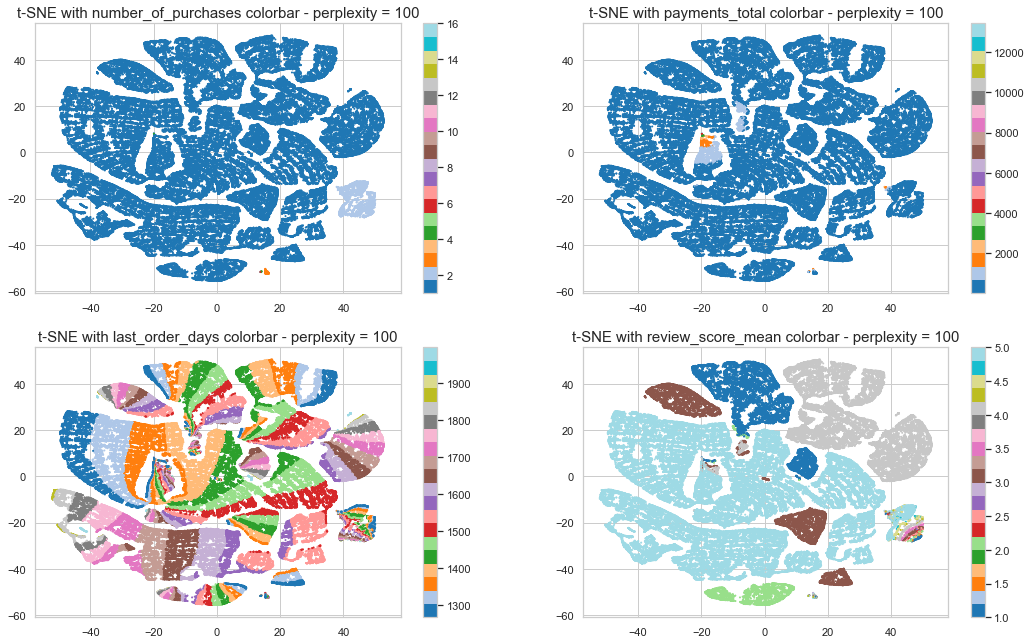

In [247]:
plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

tsne_results_p100 = pd.DataFrame(tsne_result_p100, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_4):    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results_p100['tsne1'], 
                tsne_results_p100['tsne2'], 
                c = data_4.get(feat), 
                s = 1, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - perplexity = 100', size = 15)
    plt.colorbar()

plt.show()

In [248]:
# Perplexity = 100 (default perplexity = 30)
n_components = 2
tsne = TSNE(n_components,
            init = 'pca',
            perplexity = 100,
            n_iter = 1000,
            random_state = 0)
tsne_result_p100_pca = tsne.fit_transform(X4_scaled)
tsne_result_p100_pca.shape

(94721, 2)

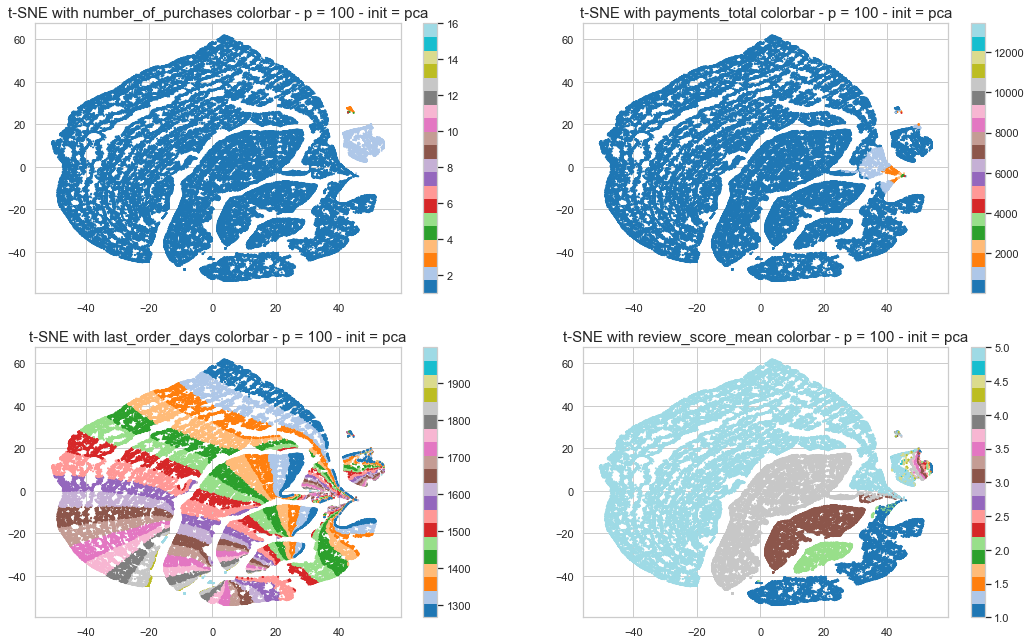

In [249]:
plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

tsne_results_p100_pca = pd.DataFrame(tsne_result_p100_pca, columns=['tsne1', 'tsne2'])

for index, feat in enumerate(list_feat_4):    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results_p100_pca['tsne1'], 
                tsne_results_p100_pca['tsne2'], 
                c = data_4.get(feat), 
                s = 1, 
                cmap = 'tab20')
    plt.title('t-SNE with '+ feat + ' colorbar - p = 100 - init = pca', size = 15)
    plt.colorbar()

plt.show()